### Data Understanding

This is a simulated data set taken from the Kaggle website and contains both legitimate and fraudulent transactions. You can download the data set using this link.
https://www.kaggle.com/kartik2112/fraud-detection

 

The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 9999)
pd.set_option("display.max_columns", 9999)

In [3]:
# Train data import
df = pd.read_csv('fraudTrain.csv')
dfTest = pd.read_csv('fraudTest.csv')

In [4]:
df = df.drop(columns='Unnamed: 0')
dfTest = dfTest.drop(columns='Unnamed: 0')

In [5]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [6]:
df.shape

(1296675, 22)

In [7]:
df.isnull().sum()
# dfTest.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

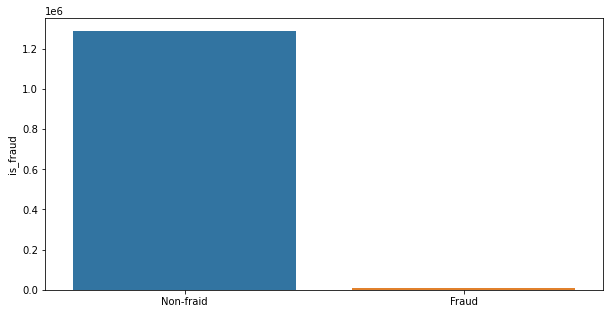

The dataset contains 1289169 of non-fraud cases and 7506 of fraud cases the ratio to fraud and non-fraud is 0.58 %


In [10]:
plt.figure(figsize=(10,5))

a = df.is_fraud.value_counts()

labels = ['Non-fraid', 'Fraud']

sns.barplot(x=labels, y= a, data= df)
plt.show()

print('The dataset contains {} of non-fraud cases and {} of fraud cases the ratio to fraud and non-fraud is {} %'.
      format(a[0], a[1], round(((a[1]/a[0])*100),2)))

#### The dataset contains 1289169 of non-fraud cases and 7506 of fraud cases the ratio to fraud and non-fraud is 0.58 %

In [11]:
# converting the columns to date-time format
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)
df.dob = pd.to_datetime(df.dob)

# converting the columns to date-time format in test data
dfTest.trans_date_trans_time = pd.to_datetime(dfTest.trans_date_trans_time)
dfTest.dob = pd.to_datetime(dfTest.dob)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [13]:
# Creating a new column Cust_age which is taken by subtracting Date of transaction and DOB in Train data
df['cust_age'] = (pd.DatetimeIndex(df.trans_date_trans_time). year) - (pd.DatetimeIndex(df.dob).year)

# Creating a new column Cust_age which is taken by subtracting Date of transaction and DOB in Test data
dfTest['cust_age'] = (pd.DatetimeIndex(dfTest.trans_date_trans_time).year) - (pd.DatetimeIndex(dfTest.dob).year)

In [14]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  cust_age  
0         0        31  
1         0        41  
2         0        57  
3         0        52  
4         0        33

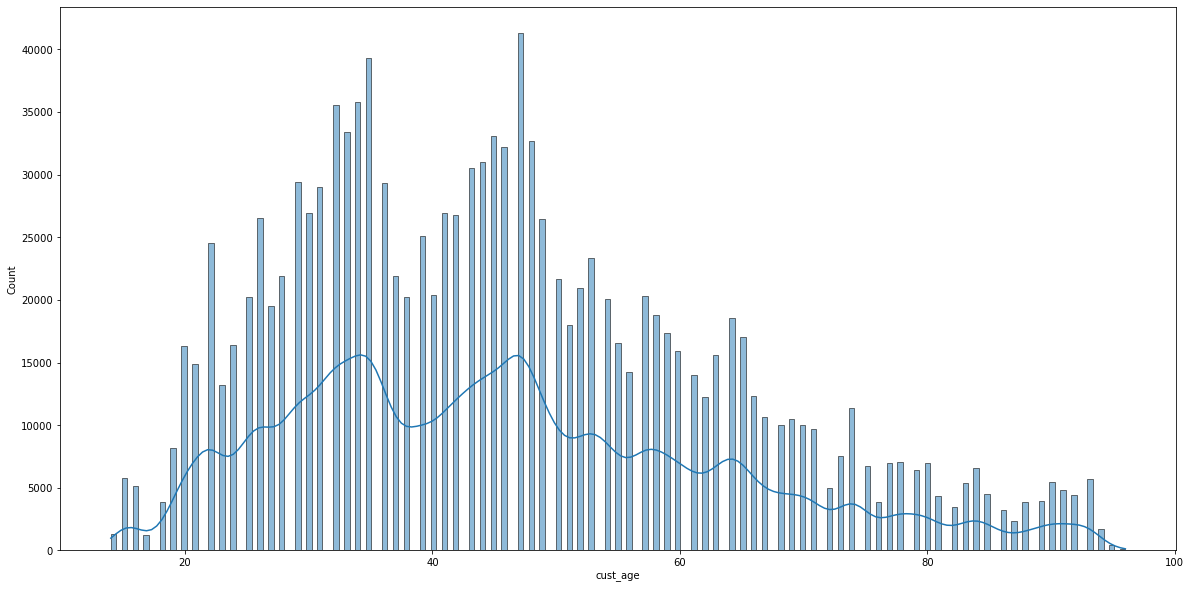

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x = df.cust_age, kde=True)
plt.show()

People between the age 25 - 50 do more transactions, the data has no outliers all the people are under 90yrs of age 

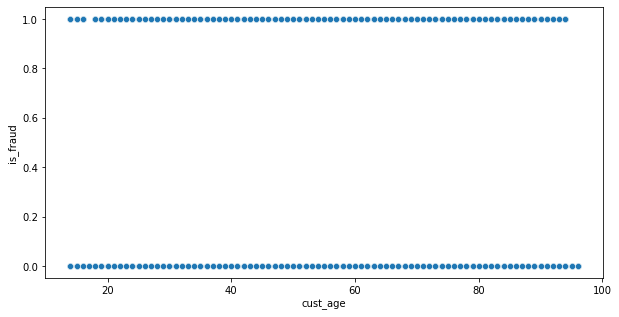

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.cust_age, y= df.is_fraud, data=df )
plt.show()

frauds are happening in all the age groups

In [17]:
# Extracting the month, day name, Hour and week day of transaction
df['month'] = pd.DatetimeIndex(df.trans_date_trans_time).month
df['day_name'] = df.trans_date_trans_time.dt.day_name()
df['hour'] = pd.DatetimeIndex(df.trans_date_trans_time).hour
df['weekday'] = pd.DatetimeIndex(df.trans_date_trans_time).weekday #The day of the week with Monday=0, Sunday=6.

# Extracting the month, day name, Hour and week day of transaction
dfTest['month'] = pd.DatetimeIndex(dfTest.trans_date_trans_time).month
dfTest['day_name'] = dfTest.trans_date_trans_time.dt.day_name()
dfTest['hour'] = pd.DatetimeIndex(dfTest.trans_date_trans_time).hour
dfTest['weekday'] = pd.DatetimeIndex(dfTest.trans_date_trans_time).weekday #The day of the week with Monday=0, Sunday=6.

In [18]:
dfTest.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job        dob  \
0  33.9659  -80.9355    333497     Mechanical engineer 1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT 1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public 1970-10-21   
3  28.5697  -80.8191     54767            Set designer 1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer 1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  cust_age  month day_name  hour  weekday  
0         0        52      6   Sunday    12        6  
1         0        30      6   Sunday    12        6  
2         0        50      6   Sunday    12        6  
3         0        33      6   Sunday    12        6  
4         0        65      6   Sunday    12        6

In [19]:
# Instanciating the fraud and non-fraud transactions 
fraud_df = df.loc[ df['is_fraud'] == 1 ]
not_fraud_df = df.loc[ df['is_fraud'] == 0 ]

**************************************************


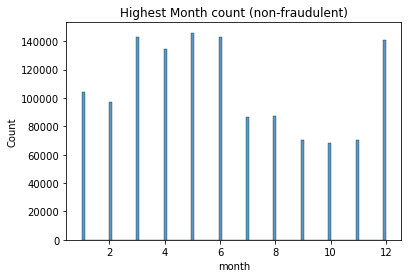

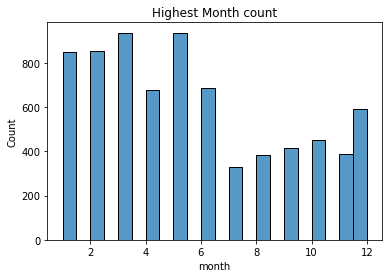

**************************************************


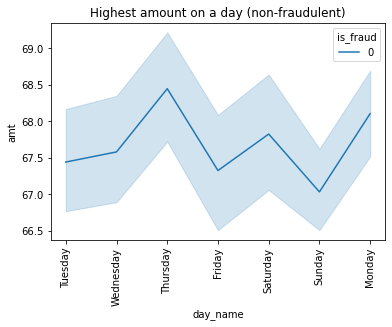

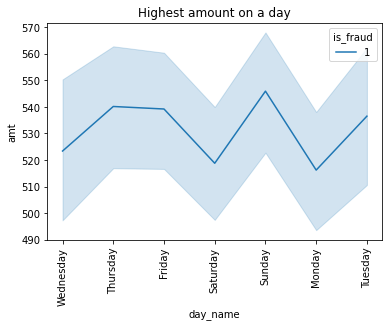

**************************************************


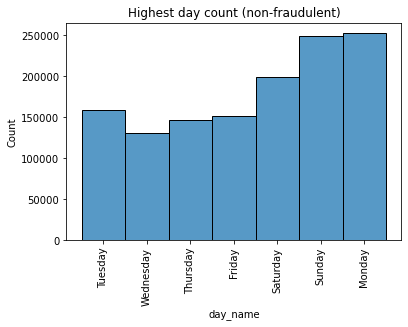

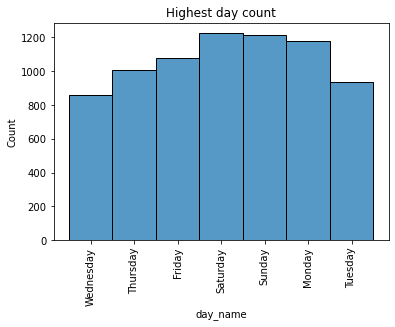

**************************************************


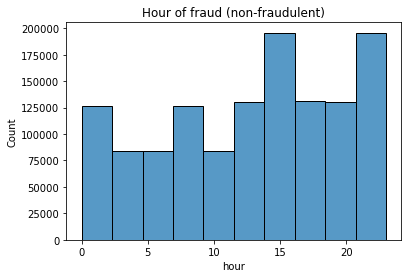

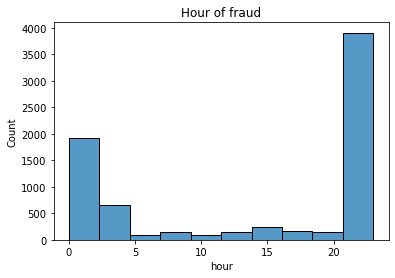

**************************************************


In [20]:
# Plots to see some basic non-fraudulent VS fraudulent transaction details from the dataset

print('*'*50)

plt.title('Highest Month count (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.month)
plt.show()

plt.title('Highest Month count')
sns.histplot(data = fraud_df, x = fraud_df.month)
plt.show()

print('*'*50)

plt.title('Highest amount on a day (non-fraudulent)')
sns.lineplot(data = not_fraud_df, x = not_fraud_df.day_name, y=not_fraud_df.amt, hue=not_fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

plt.title('Highest amount on a day')
sns.lineplot(data = fraud_df, x = fraud_df.day_name, y=fraud_df.amt, hue=fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

plt.title('Highest day count (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.day_name, bins=10)
plt.xticks(rotation = 90)
plt.show()

plt.title('Highest day count')
sns.histplot(data = fraud_df, x = fraud_df.day_name, bins=10)
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

plt.title('Hour of fraud (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.hour, bins=10)
plt.show()

plt.title('Hour of fraud')
sns.histplot(data = fraud_df, x = fraud_df.hour, bins=10)
plt.show()

print('*'*50)

#### Observation
1. the dataset has the more number of transactions in April to July and December month. it is also observed that despite December being the highest the fraudulent transactions are very less init.
2. For some reason, the fraudulent transactions are more in the 1st and 2nd quarter of the year than it drops drastically.
3. for some reason, On Sunday transactions occurs on less amount of money, and also on this day, the maximum money has been stolen the following Tuesday and Thursday.
4. More transactions occur on Sunday,  Monday, and Tuesday and it gets lesser on other days and most of the fraudulent transactions happen on weekends.
5. The number of transactions increases from morning to evening but most of the fraudulent ones happen at night time between 10:00 PM to 2:30 AM.

#### Conclusion:
More frauds happen in 1st half of the year, it happens on weekends in the night hours.

In [21]:
df.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

**************************************************


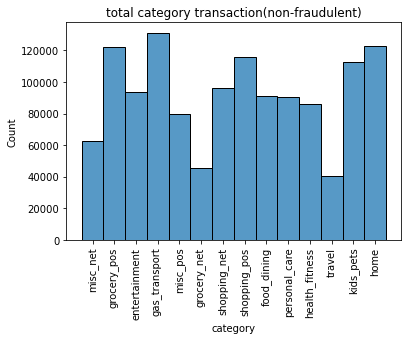

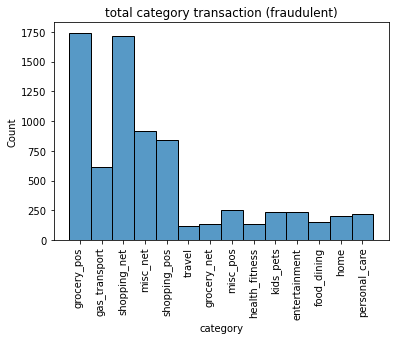

**************************************************


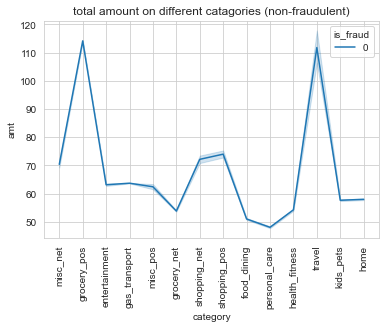

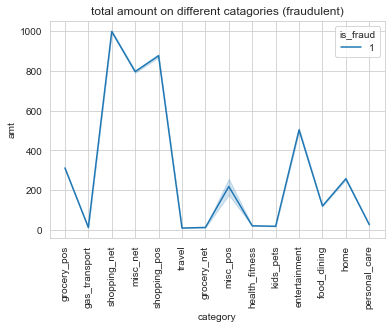

**************************************************
M    3771
F    3735
Name: gender, dtype: int64


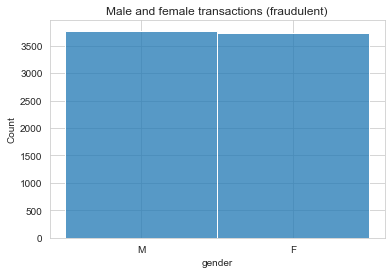

**************************************************


In [22]:
print('*'*50)

plt.title('total category transaction(non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.category)
plt.xticks(rotation = 90)
plt.show()

# print(not_fraud_df.category.value_counts())

plt.title('total category transaction (fraudulent)')
sns.histplot(data = fraud_df, x = fraud_df.category)
plt.xticks(rotation = 90)
plt.show()

# print(fraud_df.category.value_counts())

print('*'*50)

sns.set_style("whitegrid")
plt.title('total amount on different catagories (non-fraudulent)')
sns.lineplot(data = not_fraud_df, x = not_fraud_df.category, y=not_fraud_df.amt, hue=not_fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

sns.set_style("whitegrid")
plt.title('total amount on different catagories (fraudulent)')
sns.lineplot(data = fraud_df, x = fraud_df.category, y=fraud_df.amt, hue=fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

classes = fraud_df.gender.value_counts()
print(classes)
plt.title('Male and female transactions (fraudulent)')
sns.histplot(data=fraud_df, x="gender")
plt.show()

print('*'*50)

#### Observations:
1. Fraudulent transactions in the categories are seen the most in shopping_net, groceries_pos, mics_net, and shopping_pos.
2. The amount spent on non-fraudulent transactions is maximum in travel and groceries_pos but in the case of fraudulent transactions  shopping_net, mics_net, shopping_pos, and entertainment.
3. It appears fraud can happen to both females and males almost the same amount of times but it happens to males slightly more.


#### Conclusion:
More frauds happen more frequently where shopping is involved of local products.


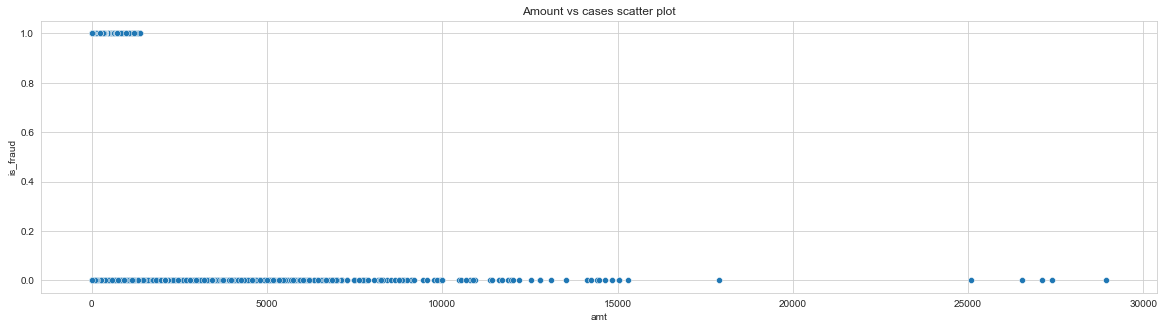

In [23]:
# Create a scatter plot to observe the distribution of cases with Amount
plt.figure(figsize=(20,5))
sns.scatterplot(df["amt"], df["is_fraud"])
plt.title("Amount vs cases scatter plot")
plt.show()

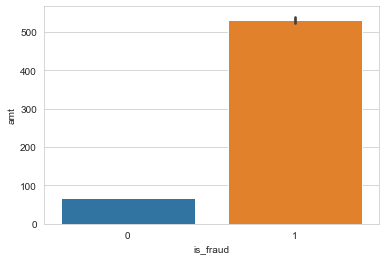

is_fraud
0    8.723434e+07
1    3.988089e+06
Name: amt, dtype: float64
****************************************
Out of total amount 91222428.9 $, 3988088.61 $ has been fraudulent and i.e 4.0% of total


In [24]:
# bar plot to show the fraud/non-fraud transactional amount 
sns.barplot(data=df, x=df.is_fraud, y=df.amt)
plt.show()
print(df.groupby(['is_fraud']).amt.sum())
print('*'*40)

f = round((fraud_df.amt.sum()/df.amt.sum()),2)*100
nf = round((not_fraud_df.amt.sum()/df.amt.sum()),2)*100
print('Out of total amount {} $, {} $ has been fraudulent and i.e {}% of total'.format((df.amt.sum()),round((fraud_df.amt.sum()),2),f))

#### Observation:
- 4% of wealth is being effected from all the fraudulent transactions 

**************************************************
highest frauds in cities 
 Houston       39
Warren        33
Naples        29
Huntsville    29
Topeka        27
Name: city, dtype: int64
----------------------------------------
lowest frauds in cities 
 Kilgore           2
Denham Springs    2
Phenix City       2
Phoenix           2
Grandview         3
Name: city, dtype: int64
**************************************************


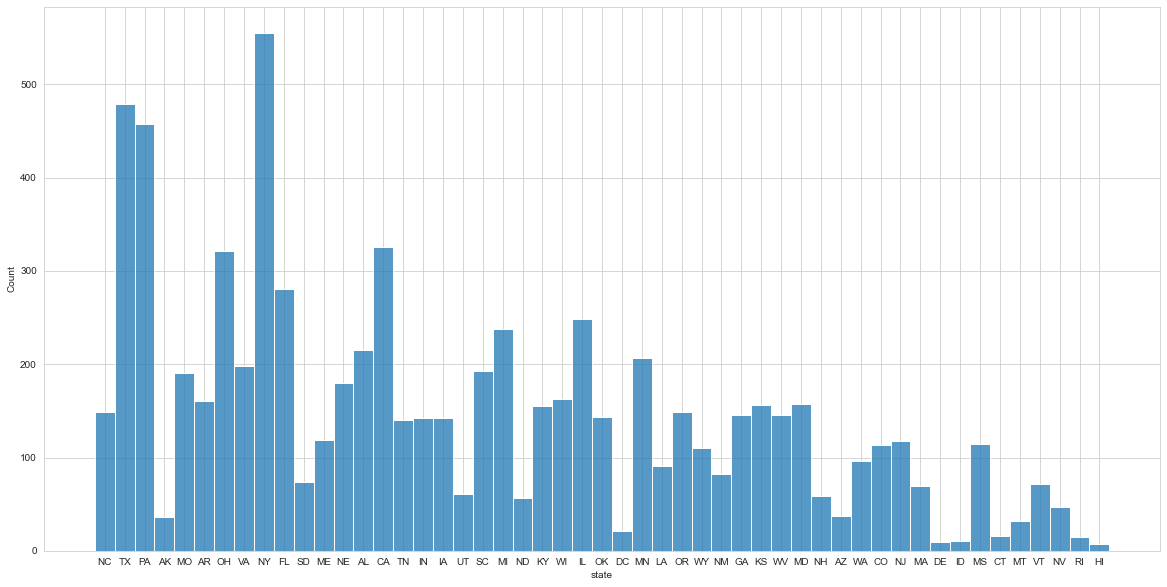

highest frauds in states 
 NY    555
TX    479
PA    458
CA    326
OH    321
Name: state, dtype: int64
----------------------------------------
lowest frauds in states 
 HI     7
DE     9
ID    11
RI    15
CT    16
Name: state, dtype: int64
**************************************************


In [25]:
print('*'*50)

print('highest frauds in cities \n',fraud_df.city.value_counts(ascending=False).head(5))
print('-'*40)
print('lowest frauds in cities \n',fraud_df.city.value_counts(ascending=True).head(5))

print('*'*50)

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.histplot(data=fraud_df, x=fraud_df.state)
plt.show()

print('highest frauds in states \n',fraud_df.state.value_counts(ascending=False).head(5))
print('-'*40)
print('lowest frauds in states \n',fraud_df.state.value_counts(ascending=True).head(5))

print('*'*50)

In [26]:
print(not_fraud_df.category.value_counts())

gas_transport     131041
home              122917
grocery_pos       121895
shopping_pos      115829
kids_pets         112796
shopping_net       95830
entertainment      93781
food_dining        91310
personal_care      90538
health_fitness     85746
misc_pos           79405
misc_net           62372
grocery_net        45318
travel             40391
Name: category, dtype: int64


#### Our dataset has the location details on card address and merchant address let us see what we can find out from those details.

In [27]:
from sklearn.metrics.pairwise import haversine_distances
import math
from math import radians

In [28]:
#testing the haversine distances
lat1 = 40.3207
lon1 = -110.436

lat2 = 39.4504979999999
lon2 = -109.960431

city = 'colombia'
state = 'SC'
ZIP = 29209

def haversineDist(lat1,lon1,lat2,lon2):
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)

    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat1) * math.cos(lat2));
    radius = 6371
    c = 2 * math.asin(math.sqrt(a))
    return radius * c

haversineDist(lat1,lon1,lat2,lon2)

98.98877101401476

Basically we now know for the testing location and destination there is some distance mentioned above

In [29]:
print(radians.__doc__)
radians(33.9659)

Convert angle x from degrees to radians.


0.5928167884031419

In [30]:
#making a new dataset for locations
geo = df[['lat', 'long', 'merch_lat', 'merch_long']]

#making a new dataset for locations
geoTest = dfTest[['lat', 'long', 'merch_lat', 'merch_long']]

In [31]:
geo.head()

lat      long  merch_lat  merch_long
0  36.0788  -81.1781  36.011293  -82.048315
1  48.8878 -118.2105  49.159047 -118.186462
2  42.1808 -112.2620  43.150704 -112.154481
3  46.2306 -112.1138  47.034331 -112.561071
4  38.4207  -79.4629  38.674999  -78.632459

In [32]:
#applying all the column values to the Haversine Distance formula we made above on train data
Dist = []
for w, x, y, z in zip(geo['lat'], geo['long'], geo['merch_lat'], geo['merch_long']):
    Dist.append(haversineDist(w,x,y,z))

# Dist

#applying all the column values to the Haversine Distance formula we made aboveon test data
DistTest = []
for w, x, y, z in zip(geoTest['lat'], geoTest['long'], geoTest['merch_lat'], geoTest['merch_long']):
    DistTest.append(haversineDist(w,x,y,z))

# DistTest

In [33]:
# Adding that values to dataset as a new column on train data
geo['dist'] = Dist
df['trans_dist'] = Dist

# Adding that values to dataset as a new column on test data
geoTest['dist'] = DistTest
dfTest['trans_dist'] = DistTest

In [34]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  cust_age  month day_name  hour  weekday  trans_dist  
0         0        31      1  Tuesday     0        1   10.509708  
1         0        41      1  Tuesday     0        1   30.171468  
2         0        57      1  Tuesday     0        1  107.746268  
3         0        52      1  Tuesday     0        1   97.629363  
4         0        33      1  Tuesday     0        1   66.236025

In [35]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'cust_age', 'month', 'day_name', 'hour',
       'weekday', 'trans_dist'],
      dtype='object')

In [36]:
import plotly.express as px

In [37]:
fraud_df.columns
df.shape

(1296675, 28)

In [38]:
df = pd.get_dummies(data=df, columns=['category'])
dfTest = pd.get_dummies(data=dfTest, columns=['category'])

In [39]:
# Converting gender values from M & F to 0 & 1
def gender_01(x):
    if x == 'F':
        return 1
    if x == 'M':
        return 0

# gender mapping on data set
df['gender'] = df['gender'].transform(gender_01)

# splitting full dat sets in 2 groups, numerical and categorical 
# this dataset has 1296675 rows, so in order to save computational power 
num_values = df.loc[:,df.dtypes!=np.object]

num_obj = df.loc[:,df.dtypes==np.object]


# gender mapping on data set
dfTest['gender'] = dfTest['gender'].transform(gender_01)

# splitting full dat sets in 2 groups, numerical and categorical 
num_values_test = dfTest.loc[:,dfTest.dtypes!=np.object]

num_obj_test = dfTest.loc[:,dfTest.dtypes==np.object]

In [40]:
num_values.head()

trans_date_trans_time            cc_num     amt  gender    zip      lat  \
0   2019-01-01 00:00:18  2703186189652095    4.97       1  28654  36.0788   
1   2019-01-01 00:00:44      630423337322  107.23       1  99160  48.8878   
2   2019-01-01 00:00:51    38859492057661  220.11       0  83252  42.1808   
3   2019-01-01 00:01:16  3534093764340240   45.00       0  59632  46.2306   
4   2019-01-01 00:03:06   375534208663984   41.96       0  24433  38.4207   

       long  city_pop        dob   unix_time  merch_lat  merch_long  is_fraud  \
0  -81.1781      3495 1988-03-09  1325376018  36.011293  -82.048315         0   
1 -118.2105       149 1978-06-21  1325376044  49.159047 -118.186462         0   
2 -112.2620      4154 1962-01-19  1325376051  43.150704 -112.154481         0   
3 -112.1138      1939 1967-01-12  1325376076  47.034331 -112.561071         0   
4  -79.4629        99 1986-03-28  1325376186  38.674999  -78.632459         0   

   cust_age  month  hour  weekday  trans_dist  category_entertainment  \
0        31      1     0        1   10.509708                       0   
1        41      1     0        1   30.171468                       0   
2        57      1     0        1  107.746268                       1   
3        52      1     0        1   97.629363                       0   
4        33      1     0        1   66.236025                       0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  
0                0  
1                0  
2                0  
3                0  
4                0

In [41]:
#Dropping 'cc_num' column as it wont be needed
num_values = num_values.drop(columns='cc_num')

#Dropping 'cc_num' column as it wont be needed in test data
num_values_test = num_values_test.drop(columns='cc_num')

In [42]:
# help(px.density_mapbox)

In [43]:
map_fig = px.density_mapbox(data_frame= fraud_df,
                            lat=fraud_df.merch_lat,
                            lon=fraud_df.merch_long, 
                            z=fraud_df.is_fraud, 
                            radius=1, 
                            #center=dict(lat = 9, lon = 9), 
                            zoom=3, hover_name = 'trans_date_trans_time', 
                            mapbox_style='open-street-map', 
                            title= 'Fraud Transaction pointers')
map_fig

In [44]:
# map_fig2 = px.density_mapbox(data_frame=num_values,lat=num_values.merch_lat,lon=num_values.merch_long,
#                          z=num_values.is_fraud,
#                          radius=3, #center=dict(lat = 9, lon = 9),
#                          zoom=3,
#                          hover_name = 'trans_date_trans_time',
#                          mapbox_style='open-street-map',
#                          title= 'All Transaction pointers')
# map_fig2

In [45]:
# map_fig = px.density_mapbox(data_frame=num_values, lat=num_values.merch_lat, lon=num_values.merch_long,
#                          z=num_values.city_pop,
#                          radius=3, #center=dict(lat = 9, lon = 9),
#                          zoom=3,
#                          hover_name = 'trans_date_trans_time',
#                          mapbox_style='open-street-map',
#                          title= 'Population pointers')
# map_fig

#### Observation:
1. some cities like Camden, Birmingham, Burroton ..etc have the highest cases of fraud.
2. The least fraud areas are near Laramie, Sherman, Littleton, etc.
3. The highest fraud is in NY, PA, TX, etc., and the least are CO, WY, HI, etc. 

#### Conclusion: 
It appears the Western region of the map is more populated and so the fraudulent activities are also more in those regions.


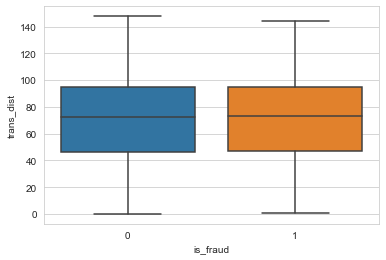

both fraud and non-fraudulent transactions are happening approximately within 140kms from the home of a customer


In [46]:
sns.boxplot(x=num_values.is_fraud, y=num_values.trans_dist)
plt.show()
print('both fraud and non-fraudulent transactions are happening approximately within 140kms from the home of a customer')

# Model Evaluation

### Train test split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
num_obj.columns

Index(['merchant', 'first', 'last', 'street', 'city', 'state', 'job',
       'trans_num', 'day_name'],
      dtype='object')

In [49]:
# splitting the columns to get target variable and predictor variable and dropping some unnecessary columns 

y = num_values.is_fraud
X = num_values.drop(columns=['zip','lat', 'long','merch_lat', 'merch_long','is_fraud',
                             'trans_date_trans_time', 'unix_time', 'dob'])
# X.columns

yTestCsv = num_values_test.is_fraud
XTestCsv = num_values_test.drop(columns=['zip','lat', 'long','merch_lat', 'merch_long','is_fraud',
                                         'trans_date_trans_time', 'unix_time', 'dob'])

In [50]:
print(X.columns, '\n', XTestCsv.columns)

Index(['amt', 'gender', 'city_pop', 'cust_age', 'month', 'hour', 'weekday',
       'trans_dist', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object') 
 Index(['amt', 'gender', 'city_pop', 'cust_age', 'month', 'hour', 'weekday',
       'trans_dist', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')


<Figure size 1440x432 with 0 Axes>

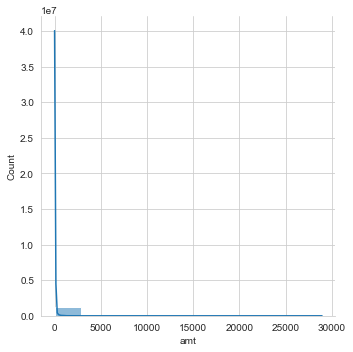

<Figure size 1440x432 with 0 Axes>

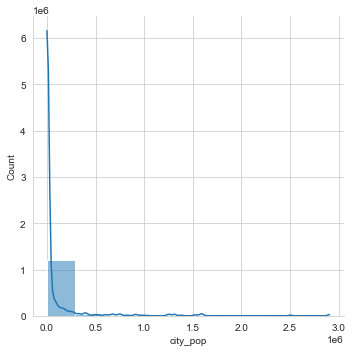

In [51]:
plt.figure(figsize=[20,6])
sns.displot(X.amt, bins=10, kde=True)

plt.figure(figsize=[20,6])
sns.displot(X.city_pop, bins=10, kde=True)


plt.show()

In [52]:
X['amt'] = np.log(X['amt'])
X['city_pop'] = np.log(X['city_pop'])

<Figure size 1440x432 with 0 Axes>

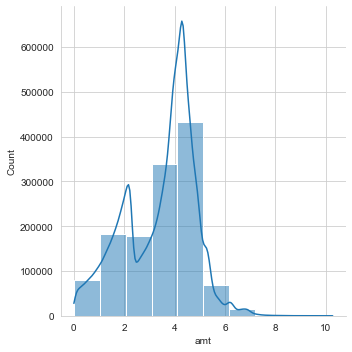

<Figure size 1440x432 with 0 Axes>

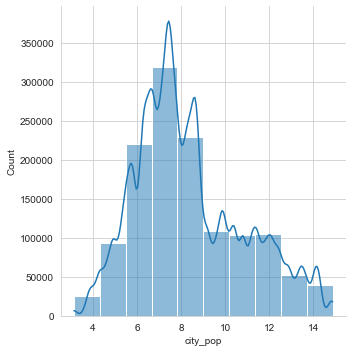

In [53]:
plt.figure(figsize=[20,6])
sns.displot(X.amt, bins=10, kde=True)

plt.figure(figsize=[20,6])
sns.displot(X.city_pop, bins=10, kde=True)

plt.show()

In [54]:
# Splitting the data in 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42,stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [55]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1296675, 22) (907672, 22) (389003, 22)
(1296675,) (907672,) (389003,)


### Decision Tree classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
#fitting the model
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Decision trees visualisation Library
from sklearn.tree import plot_tree


# Scoring parameters 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, average_precision_score, precision_recall_curve, classification_report 


# AUC-ROC 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [59]:
# Hyperparameter tuning using cross validation (GridSearchCV) 
from sklearn.model_selection import GridSearchCV

In [60]:
# help(DecisionTreeClassifier)

In [61]:
#giving the parameters to the GridSearchCV to fit models on it and find the best fit model

params = {'criterion' : ['gini', 'entropy'],           
          'max_depth': [7],         
          'min_samples_leaf': [40,45,50,55,60,65] 
          }

### Creating helper functions to evaluate model performance and help plot the decision tree

In [62]:
# Making helper function to plot decision tree
def getDtGraphs(dt_classifiers):
    plt.figure(figsize=(60,30))

    graph = plot_tree(decision_tree=dt_classifiers, 
                      feature_names=X_train.columns, 
                      filled=True, rounded=True, 
                      precision=2, 
                      class_names=['fraudulent', 'non-fraudulent'])
    plt.show()
    return graph

In [63]:
# Making helper function for model performance
def eval_model(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train,y_train_pred))
    print('recall_score - \t',recall_score(y_train,y_train_pred))
    print('f1_score - \t',f1_score(y_train,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))

In [64]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [65]:
gsCV = GridSearchCV(estimator=dt,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [66]:
%%time
gsCV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 33s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [67]:
gsCV.cv_results_

{'mean_fit_time': array([7.95534492, 7.97721753, 8.07019253, 8.11570392, 8.69125705,
        8.22603912, 9.54299674, 9.61320095, 9.34137502, 8.60275183,
        8.01680889, 7.24529219]),
 'std_fit_time': array([0.12295697, 0.17697428, 0.17068133, 0.2027857 , 0.38322002,
        0.16595751, 0.65846213, 0.42760236, 1.15631123, 0.3763904 ,
        0.1153323 , 0.62756304]),
 'mean_score_time': array([0.09787354, 0.10077224, 0.10756664, 0.10934811, 0.11568666,
        0.09726219, 0.11472526, 0.12468872, 0.10297384, 0.08476639,
        0.08300357, 0.05428257]),
 'std_score_time': array([0.02261086, 0.01148066, 0.02462872, 0.00987971, 0.01245162,
        0.01350644, 0.01281681, 0.04814004, 0.01491195, 0.00599514,
        0.00486816, 0.01273295]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, F

In [68]:
# you can fit the above results in a different data set 
result = pd.DataFrame(gsCV.cv_results_)
result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.955345      0.122957         0.097874        0.022611   
1       7.977218      0.176974         0.100772        0.011481   
2       8.070193      0.170681         0.107567        0.024629   
3       8.115704      0.202786         0.109348        0.009880   
4       8.691257      0.383220         0.115687        0.012452   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               7                     40   
1            gini               7                     45   
2            gini               7                     50   
3            gini               7                     55   
4            gini               7                     60   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.998254   
1  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.998193   
2  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.998122   
3  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.998089   
4  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.998083   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.998149           0.998111           0.998232           0.998287   
1           0.998138           0.997984           0.998155           0.998276   
2           0.998011           0.997967           0.998116           0.998243   
3           0.998017           0.997962           0.998122           0.998243   
4           0.997995           0.997901           0.998122           0.998237   

   mean_test_score  std_test_score  rank_test_score  
0         0.998206        0.000066                1  
1         0.998149        0.000095                2  
2         0.998092        0.000096                3  
3         0.998086        0.000096                4  
4         0.998068        0.000114                5

In [69]:
# so this is best parameters selected by the model
gsCV.best_params_

#lets instanciate it
best_CV = gsCV.best_estimator_
best_CV

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)

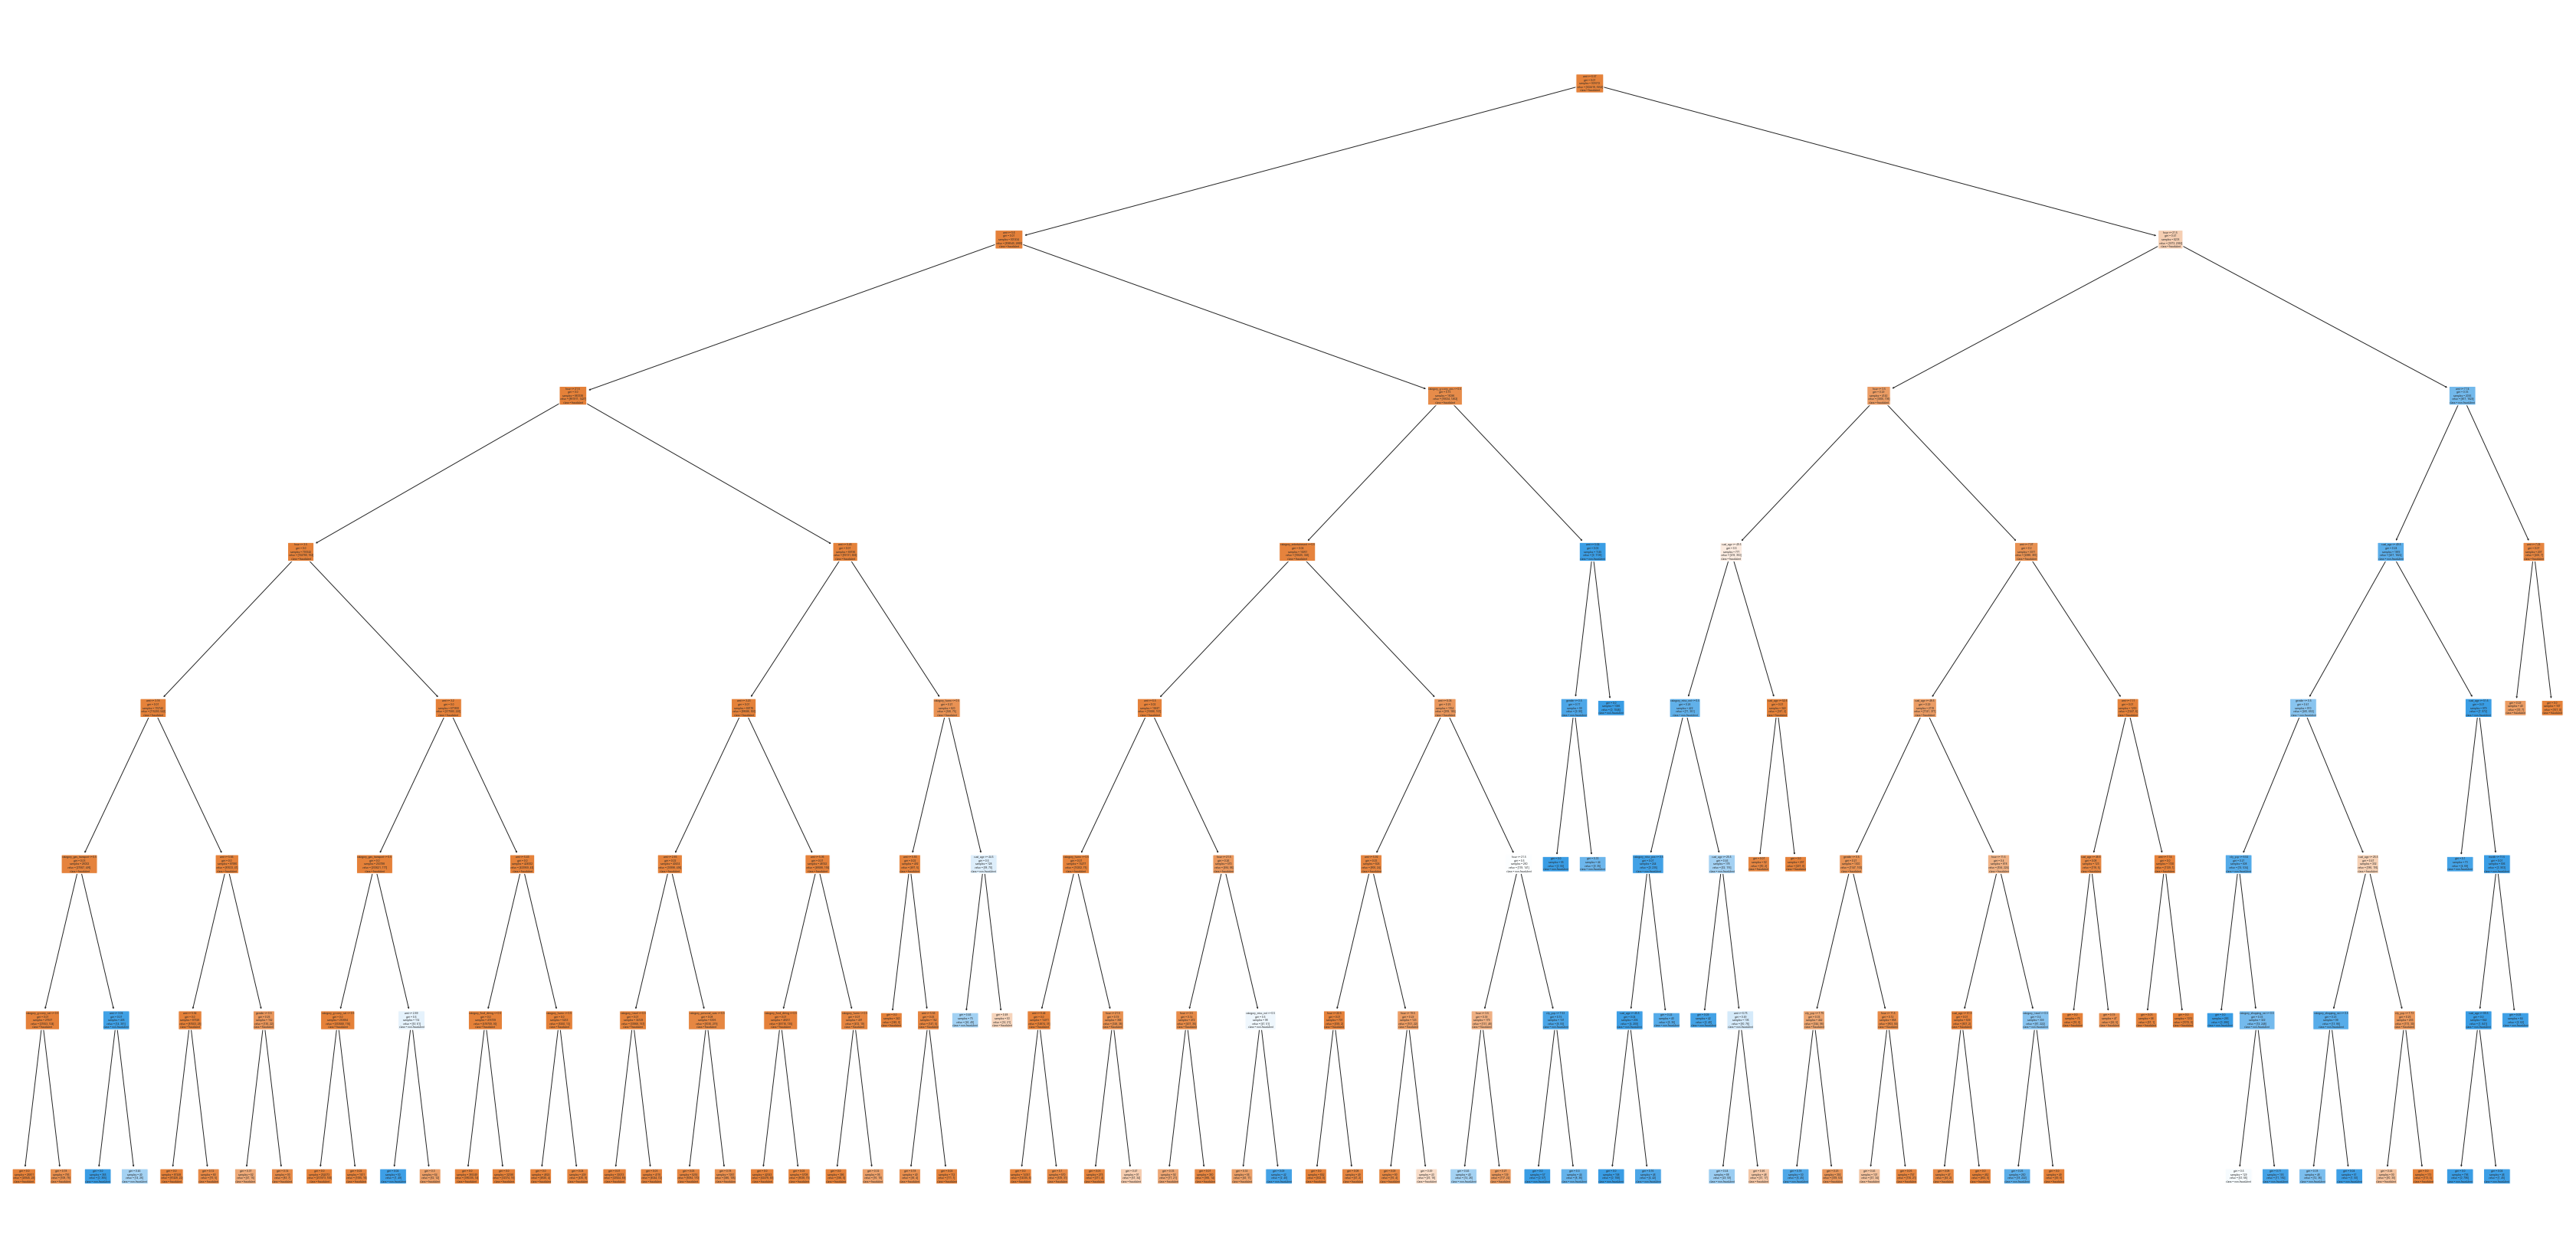

In [70]:
getDtGraphs(best_CV)
plt.show()

Train set perforance
accuracy_score - 	 0.998316572506368
recall_score - 	 0.7569470879330035
f1_score - 	 0.8388525627504747
confusion_matrix - 
 [[902167    251]
 [  1277   3977]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9982905016156688
recall_score - 	 0.7526642984014209
f1_score - 	 0.8360049321824907
confusion_matrix - 
 [[386643    108]
 [   557   1695]]


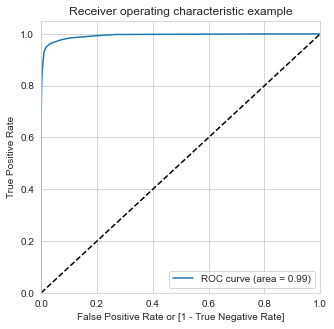

In [71]:
#Model Evaluation 

eval_model(best_CV)

# Plotting the AUC-ROC curve

dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=65,random_state=42)
dt.fit(X_train, y_train)

# Predicted probability
y_train_pred_proba = dt.predict_proba(X_train)[:,1]

# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### The test scores are not very good when we run the decision tree model on the data set. Now lets try sampling and see the results

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smt = SMOTE(random_state=42)
X_train_SMT,y_train_SMT=smt.fit_resample(X_train,y_train)

In [74]:
X_train_SMT.shape, y_train_SMT.shape

((1804836, 22), (1804836,))

In [75]:
#fitting the model
dt_SMT= DecisionTreeClassifier(random_state=42)
dt_SMT.fit(X_train_SMT,y_train_SMT)

DecisionTreeClassifier(random_state=42)

In [76]:
gsCV_SMT = GridSearchCV(estimator=dt_SMT,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [77]:
%%time
gsCV_SMT.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 3min 1s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [78]:
# you can fit the above results in a different data set 
result_SMT = pd.DataFrame(gsCV_SMT.cv_results_)
result_SMT.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.570633      0.240127         0.201198        0.052277   
1      16.673174      0.184870         0.206331        0.078871   
2      16.597217      0.063754         0.198460        0.069203   
3      16.654719      0.136574         0.232258        0.057061   
4      16.667617      0.326672         0.200896        0.036478   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               7                     40   
1            gini               7                     45   
2            gini               7                     50   
3            gini               7                     55   
4            gini               7                     60   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935634   
1  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935626   
2  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935612   
3  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935576   
4  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935537   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.935110           0.935540           0.935512           0.936025   
1           0.935091           0.935537           0.935512           0.936011   
2           0.935099           0.935540           0.935484           0.935991   
3           0.935085           0.935518           0.935482           0.935994   
4           0.935044           0.935473           0.935462           0.935983   

   mean_test_score  std_test_score  rank_test_score  
0         0.935564        0.000292                1  
1         0.935555        0.000293                2  
2         0.935545        0.000285                3  
3         0.935531        0.000289                4  
4         0.935500        0.000298                5

In [79]:
# so this is best parameters selected by the model
gsCV_SMT.best_params_

#lets instanciate it
best_CV_SMT = gsCV_SMT.best_estimator_
best_CV_SMT

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)

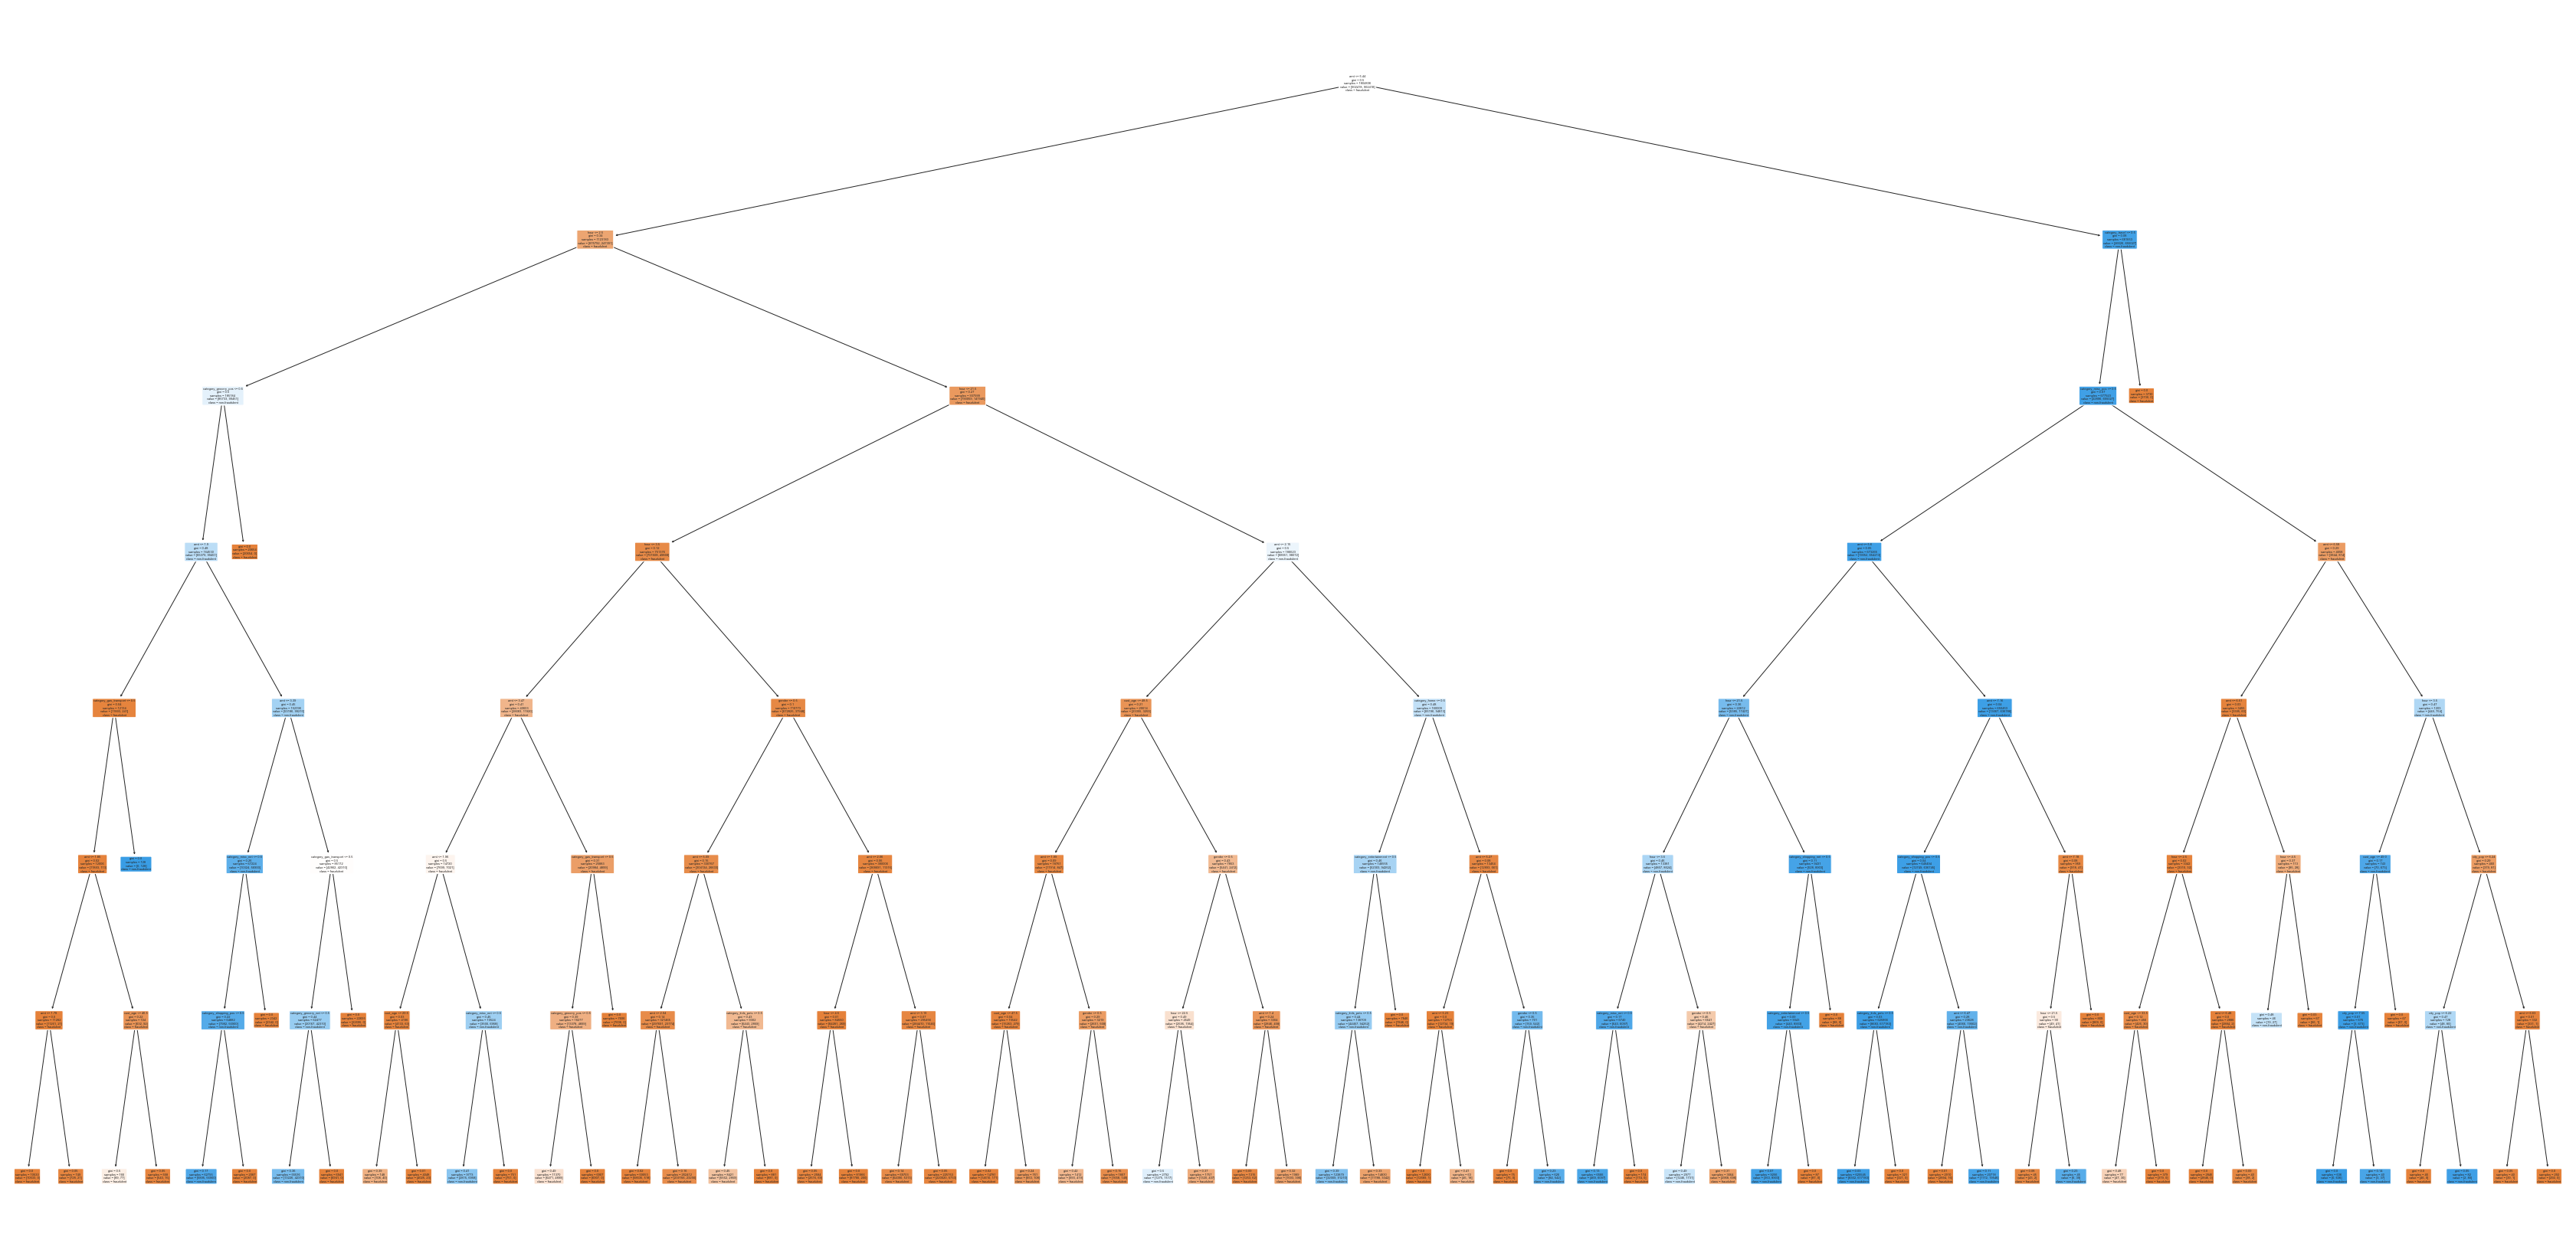

In [80]:
getDtGraphs(best_CV_SMT)
plt.show()

### Creating helper functions to evaluate model performance for smote model

In [81]:
# Making helper function for model performance
def eval_model_smt(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train_SMT)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train_SMT,y_train_pred))
    print('recall_score - \t',recall_score(y_train_SMT,y_train_pred))
    print('f1_score - \t',f1_score(y_train_SMT,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train_SMT,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))

Train set perforance
accuracy_score - 	 0.9356340409876576
recall_score - 	 0.9461735027448477
f1_score - 	 0.9363053483330391
confusion_matrix - 
 [[834822  67596]
 [ 48574 853844]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9249748716590874
recall_score - 	 0.9129662522202486
f1_score - 	 0.1234946091239451
confusion_matrix - 
 [[357762  28989]
 [   196   2056]]


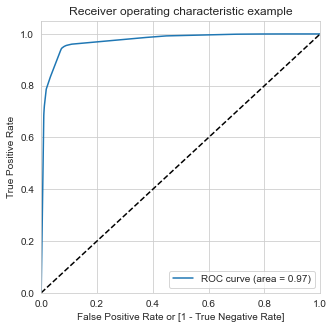

In [82]:
eval_model_smt(best_CV_SMT)

# Plotting the AUC-ROC curve

dt_smt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=55, random_state=42)
dt_smt.fit(X_train_SMT, y_train_SMT)

# Predicted probability
y_train_SMT_pred_proba = dt_smt.predict_proba(X_train_SMT)[:,1]

# Plotting the ROC curve
draw_roc(y_train_SMT, y_train_SMT_pred_proba)

#### the test results improved considerately from the previous model where the decision tree was modeled from the train data, so we know now that SMOTE oversampling technique is helping the model predict the outcome.

### Decision Tree with Adasyn sampling 

In [83]:
from imblearn.over_sampling import ADASYN

In [84]:
ada = ADASYN(random_state=42)
X_train_ada,y_train_ada=ada.fit_resample(X_train,y_train)

In [85]:
X_train_ada.shape,y_train_ada.shape

((1804001, 22), (1804001,))

In [86]:
dt_ada = DecisionTreeClassifier(random_state=42)
dt_ada.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(random_state=42)

In [87]:
gsCV_ada = GridSearchCV(estimator=dt_ada,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [88]:
%%time
gsCV_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 2min 32s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [89]:
# you can fit the above results in a different data set 
result_ada = pd.DataFrame(gsCV_ada.cv_results_)
result_ada.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.920149      0.335211         0.212974        0.077563   
1      13.750897      0.168159         0.181728        0.032304   
2      13.893790      0.056051         0.201776        0.056588   
3      14.127795      0.237227         0.221903        0.016394   
4      14.033359      0.331811         0.198713        0.031292   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               7                     40   
1            gini               7                     45   
2            gini               7                     50   
3            gini               7                     55   
4            gini               7                     60   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935638   
1  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935635   
2  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935632   
3  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935588   
4  {'criterion': 'gini', 'max_depth': 7, 'min_sam...           0.935588   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.937187           0.924626           0.926023           0.935895   
1           0.937156           0.924626           0.926023           0.935909   
2           0.937045           0.924626           0.925912           0.935912   
3           0.937045           0.924626           0.925912           0.935915   
4           0.937045           0.924626           0.925912           0.935915   

   mean_test_score  std_test_score  rank_test_score  
0         0.931874        0.005391                1  
1         0.931870        0.005387                2  
2         0.931825        0.005390                3  
3         0.931817        0.005384                4  
4         0.931817        0.005384                4

In [90]:
# so this is best parameters selected by the model
gsCV_ada.best_params_

#lets instanciate it
best_CV_ada = gsCV_ada.best_estimator_
best_CV_ada

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)

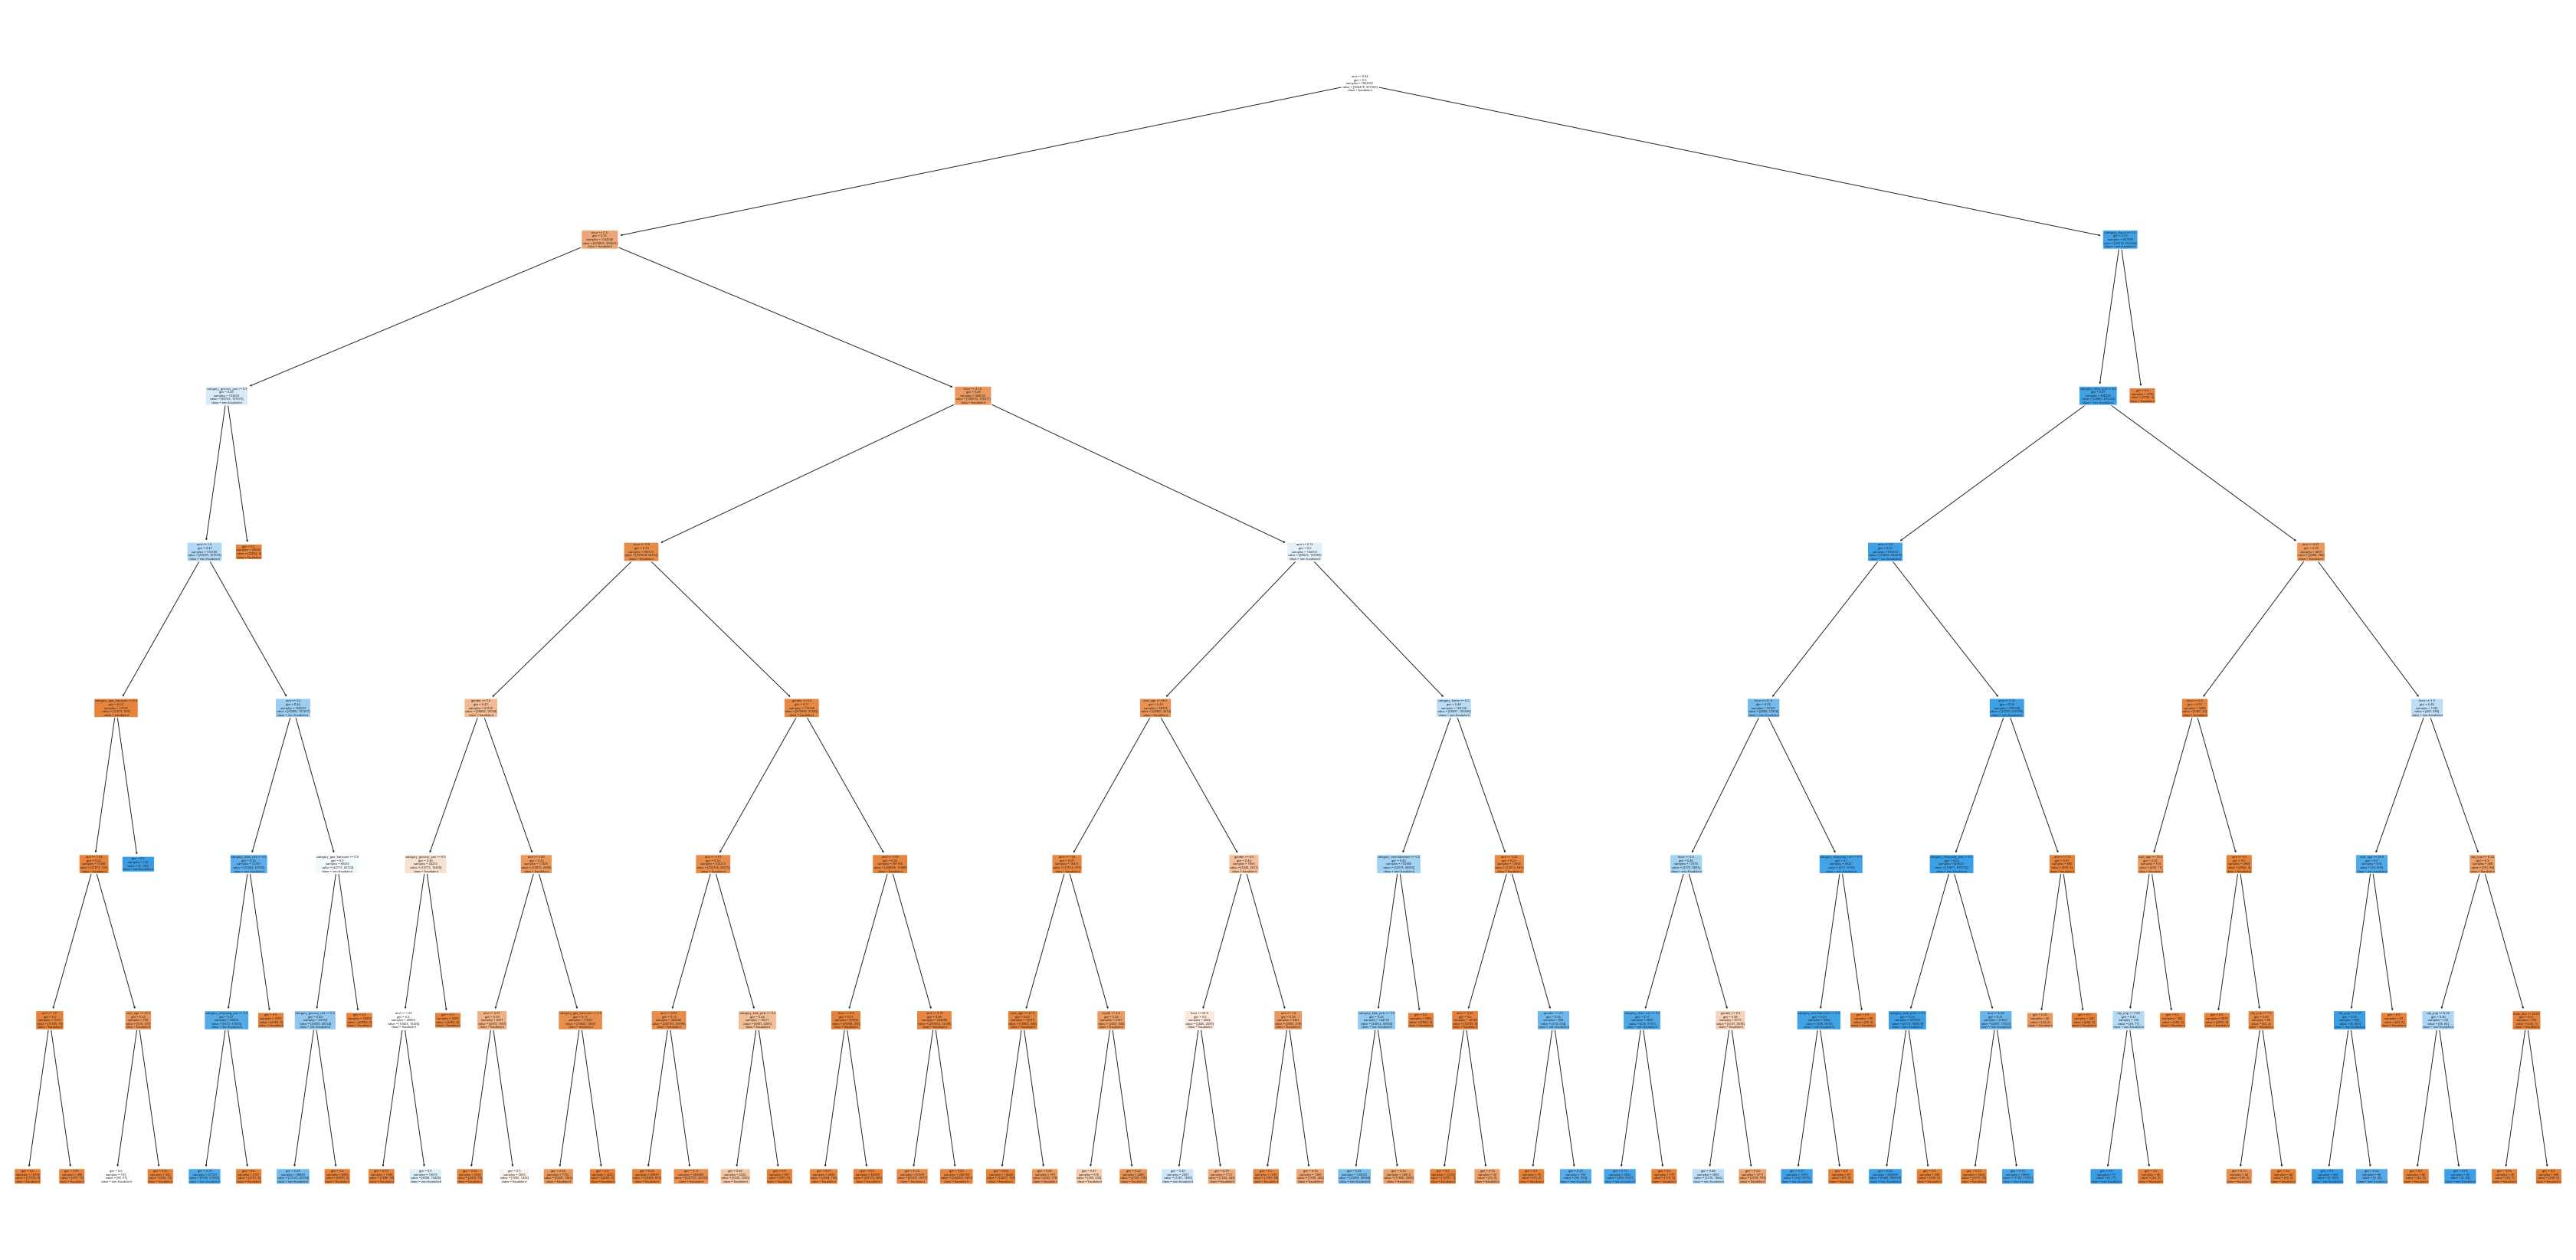

In [91]:
getDtGraphs(best_CV_ada)
plt.show()

### Creating helper function to evaluate model performance for adasyn model

In [92]:
# Making helper function for model performance
def eval_model_ada(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train_ada)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train_ada,y_train_pred))
    print('recall_score - \t',recall_score(y_train_ada,y_train_pred))
    print('f1_score - \t',f1_score(y_train_ada,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train_ada,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))

Train set perforance
accuracy_score - 	 0.9314224326926648
recall_score - 	 0.944720563719591
f1_score - 	 0.9322932002044656
confusion_matrix - 
 [[828543  73875]
 [ 49839 851744]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9178952347411202
recall_score - 	 0.9076376554174067
f1_score - 	 0.11347045271601855
confusion_matrix - 
 [[355020  31731]
 [   208   2044]]


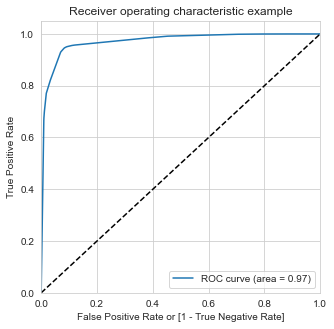

In [93]:
eval_model_ada(best_CV_ada)

# Plotting the AUC-ROC curve

dt_ada = DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)
dt_ada.fit(X_train_ada, y_train_ada)

# Predicted probability
y_train_ada_pred_proba = dt_ada.predict_proba(X_train_ada)[:,1]

# Plotting the ROC curve
draw_roc(y_train_ada, y_train_ada_pred_proba)

#### The test results improved considerately from the normal model where the decision tree was modeled from the train data, but this model (ADASYN) is working slightly better than the SMOTE.

### We now have seen the decision tree models with different sampling techniques lets move to a diffrent model to see if other can do a better job in predicting the outcome than decision trees

# XGBoost : Extreme Gradient Boosting

In [94]:
from xgboost import XGBClassifier

In [95]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[18:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:58]

[18:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [96]:
# cross validation results
cv_results = pd.DataFrame(xgb_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.019061      0.164243         0.105464        0.008291   
1      22.801997      0.615220         0.102532        0.003147   
2      23.913063      0.369050         0.106818        0.016140   
3      20.749872      0.999035         0.099512        0.006745   
4      23.561276      1.193669         0.102728        0.009809   
5      24.072471      0.556003         0.095048        0.007217   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.996514   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.995915   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.994315   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.994766   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.996563   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.663443   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.992684           0.991484           0.991182           0.995131   
1           0.994857           0.992760           0.989420           0.995728   
2           0.994412           0.991964           0.990070           0.994329   
3           0.724629           0.912253           0.993897           0.994535   
4           0.990197           0.975617           0.995891           0.996530   
5           0.996678           0.996737           0.994640           0.984686   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.993399        0.002088                2            0.995096   
1         0.993736        0.002431                1            0.994760   
2         0.993018        0.001740                3            0.993766   
3         0.924016        0.104647                6            0.995996   
4         0.990960        0.008034                4            0.997004   
5         0.927237        0.131972                5            0.658944   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.993851            0.995131            0.995089   
1            0.995617            0.993799            0.995407   
2            0.995431            0.995706            0.995114   
3            0.709289            0.913849            0.997068   
4            0.987841            0.980706            0.997636   
5            0.998156            0.998174            0.998271   

   split4_train_score  mean_train_score  std_train_score  
0            0.994493          0.994732         0.000501  
1            0.995327          0.994982         0.000656  
2            0.993617          0.994727         0.000867  
3            0.996604          0.922561         0.111344  
4            0.997763          0.992190         0.006851  
5            0.979216          0.926552         0.134006

In [97]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv.best_score_)
print(xgb_cv.best_estimator_)
print(xgb_cv.best_params_)

Best roc auc score :  0.9937359022574785
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.2, 'subsample': 0.6}


In [98]:
# XGboost model with optimal hyperparameter

xgb_param = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = xgb_param)
xgb_imb_model.fit(X_train, y_train)

[18:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.9992772719660846
recall_score - 	 0.8867529501332319
f1_score - 	 0.9342289953880089
confusion_matrix - 
 [[902357     61]
 [   595   4659]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9988534792790801
recall_score - 	 0.8405861456483126
f1_score - 	 0.8946124763705104
confusion_matrix - 
 [[386664     87]
 [   359   1893]]


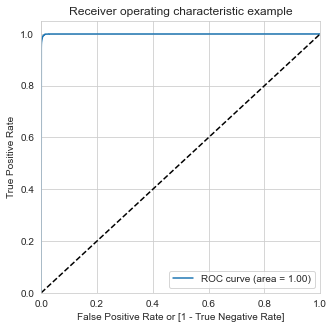

Train
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


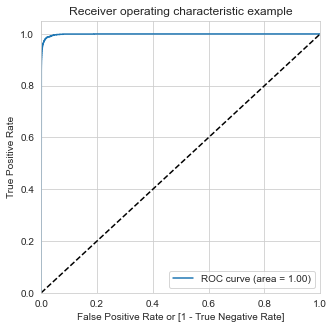

Test


In [99]:
# evaluate the model
eval_model(xgb_imb_model)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model.predict_proba(X_train)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train, y_train_xgb_pred_proba)
print('Train')

print('- -'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

#### XGboost with ADASYN

In [100]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, 
                          n_estimators=200)


xgb_cv_ada = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_cv_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[18:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:18]

[19:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [101]:
# cross validation results
cv_results_ada = pd.DataFrame(xgb_cv_ada.cv_results_)
cv_results_ada

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      49.536596      0.772855         0.186220        0.012417   
1      52.946386      0.355876         0.176548        0.004025   
2      54.502398      0.219184         0.192436        0.024255   
3      50.056297      0.627527         0.187591        0.003552   
4      53.602759      0.709617         0.194020        0.010443   
5      54.523397      0.100987         0.190206        0.007898   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999088   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.998936   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.998923   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999660   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999732   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999719   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.999127           0.998920           0.999192           0.999318   
1           0.999097           0.998880           0.999016           0.999173   
2           0.999093           0.999002           0.998918           0.999280   
3           0.999800           0.999745           0.999852           0.999851   
4           0.999818           0.999768           0.999844           0.999852   
5           0.999794           0.999694           0.999856           0.999824   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.999129        0.000130                4            0.999230   
1         0.999020        0.000106                6            0.999108   
2         0.999043        0.000135                5            0.999072   
3         0.999782        0.000072                2            0.999835   
4         0.999803        0.000046                1            0.999891   
5         0.999777        0.000062                3            0.999887   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999032            0.999176            0.999212   
1            0.998974            0.999123            0.999037   
2            0.999033            0.999239            0.998913   
3            0.999844            0.999843            0.999845   
4            0.999856            0.999841            0.999842   
5            0.999851            0.999787            0.999850   

   split4_train_score  mean_train_score  std_train_score  
0            0.999189          0.999168         0.000071  
1            0.999092          0.999067         0.000055  
2            0.999204          0.999092         0.000118  
3            0.999844          0.999842         0.000003  
4            0.999818          0.999850         0.000024  
5            0.999800          0.999835         0.000036

In [102]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv_ada.best_score_)
print(xgb_cv_ada.best_estimator_)
print(xgb_cv_ada.best_params_)

Best roc auc score :  0.9998025455137626
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.6, 'subsample': 0.6}


In [103]:
# XGboost model with optimal hyperparameter

xgb_param_ada = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model_ada = XGBClassifier(params = xgb_param_ada)
xgb_imb_model_ada.fit(X_train_ada, y_train_ada)

[19:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.9984384709321115
recall_score - 	 0.9983750802754711
f1_score - 	 0.9984376499193313
confusion_matrix - 
 [[901066   1352]
 [  1465 900118]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9975578594509554
recall_score - 	 0.8796625222024866
f1_score - 	 0.8065960912052117
confusion_matrix - 
 [[386072    679]
 [   271   1981]]


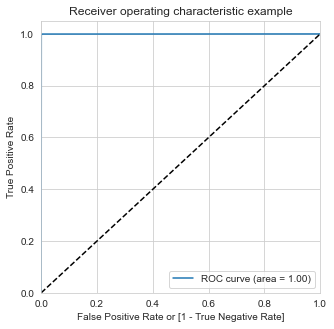

Train
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


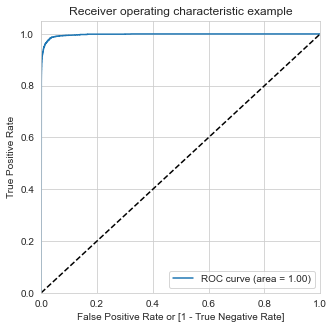

Test


In [104]:
# evaluate the model
eval_model_ada(xgb_imb_model_ada)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model_ada.predict_proba(X_train_ada)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train_ada, y_train_xgb_pred_proba)
print('Train')

print('- -'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model_ada.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

#### XGboost with SMOTE

In [105]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, 
                          n_estimators=200)


xgb_cv_SMT = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_cv_SMT.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[19:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:22:13]

[19:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [106]:
# cross validation results
cv_results_SMT = pd.DataFrame(xgb_cv_SMT.cv_results_)
cv_results_SMT

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      57.588693      0.286970         0.183643        0.005438   
1      60.790043      1.325175         0.176296        0.004872   
2      61.798015      0.726455         0.188907        0.017313   
3      57.969220      1.621696         0.200833        0.009835   
4      64.159687      2.906629         0.199838        0.016430   
5      62.773055      1.765920         0.200222        0.017819   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.998941   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.998904   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.998959   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999734   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999726   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999733   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.999272           0.999117           0.999275           0.999218   
1           0.999147           0.999145           0.999352           0.999211   
2           0.999189           0.999016           0.999188           0.999141   
3           0.999857           0.999867           0.999873           0.999861   
4           0.999781           0.999867           0.999879           0.999885   
5           0.999871           0.999858           0.999863           0.999845   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.999165        0.000125                4            0.999225   
1         0.999152        0.000145                5            0.999176   
2         0.999099        0.000094                6            0.999215   
3         0.999839        0.000052                1            0.999877   
4         0.999827        0.000063                3            0.999879   
5         0.999834        0.000051                2            0.999879   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999204            0.999105            0.999226   
1            0.999068            0.999134            0.999295   
2            0.999115            0.999002            0.999132   
3            0.999834            0.999862            0.999846   
4            0.999788            0.999858            0.999854   
5            0.999850            0.999851            0.999827   

   split4_train_score  mean_train_score  std_train_score  
0            0.999169          0.999186         0.000045  
1            0.999169          0.999168         0.000074  
2            0.999092          0.999111         0.000069  
3            0.999836          0.999851         0.000016  
4            0.999860          0.999848         0.000031  
5            0.999836          0.999849         0.000018

In [107]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv_SMT.best_score_)
print(xgb_cv_SMT.best_estimator_)
print(xgb_cv_SMT.best_params_)

Best roc auc score :  0.9998385422337563
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.6, 'subsample': 0.3}


In [108]:
# XGboost model with optimal hyperparameter

xgb_param = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model_SMT = XGBClassifier(params = xgb_param)
xgb_imb_model_SMT.fit(X_train, y_train)

[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.7773609347331281
recall_score - 	 0.5547894656356589
f1_score - 	 0.7136211800608782
confusion_matrix - 
 [[902357     61]
 [401766 500652]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9988534792790801
recall_score - 	 0.8405861456483126
f1_score - 	 0.8946124763705104
confusion_matrix - 
 [[386664     87]
 [   359   1893]]


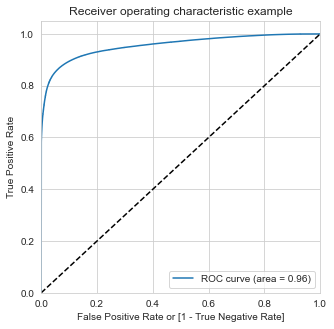

Train
--------------------------------------------------------------------------------


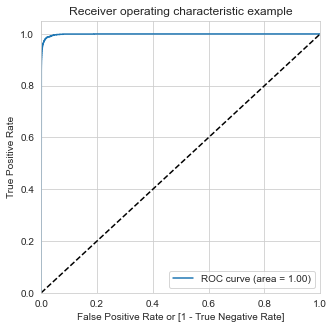

Test


In [109]:
# evaluate the model
eval_model_smt(xgb_imb_model_SMT)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model_SMT.predict_proba(X_train_SMT)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train_SMT, y_train_xgb_pred_proba)
print('Train')

print('--'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model_SMT.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

# Logistic Regression 

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
X_scaler = scaler.fit_transform(X_train)
# scaler.data_max_

XScaler = pd.DataFrame(X_scaler, columns= X_train.columns)

In [113]:
XScaler.describe()

amt         gender       city_pop       cust_age  \
count  907672.000000  907672.000000  907672.000000  907672.000000   
mean        0.338385       0.546463       0.444534       0.390598   
std         0.135762       0.497837       0.208781       0.211927   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.221962       0.000000       0.295607       0.231707   
50%         0.377921       1.000000       0.397615       0.365854   
75%         0.432530       1.000000       0.577530       0.524390   
max         1.000000       1.000000       1.000000       1.000000   

               month           hour        weekday     trans_dist  \
count  907672.000000  907672.000000  907672.000000  907672.000000   
mean        0.467487       0.557008       0.511918       0.473839   
std         0.310628       0.296449       0.366391       0.206338   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.181818       0.304348       0.166667       0.314787   
50%         0.454545       0.608696       0.500000       0.488281   
75%         0.727273       0.826087       0.833333       0.640658   
max         1.000000       1.000000       1.000000       1.000000   

       category_entertainment  category_food_dining  category_gas_transport  \
count           907672.000000         907672.000000           907672.000000   
mean                 0.072613              0.070724                0.101804   
std                  0.259501              0.256363                0.302391   
min                  0.000000              0.000000                0.000000   
25%                  0.000000              0.000000                0.000000   
50%                  0.000000              0.000000                0.000000   
75%                  0.000000              0.000000                0.000000   
max                  1.000000              1.000000                1.000000   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
count         907672.000000         907672.000000            907672.000000   
mean               0.034993              0.095182                 0.066187   
std                0.183762              0.293466                 0.248609   
min                0.000000              0.000000                 0.000000   
25%                0.000000              0.000000                 0.000000   
50%                0.000000              0.000000                 0.000000   
75%                0.000000              0.000000                 0.000000   
max                1.000000              1.000000                 1.000000   

       category_home  category_kids_pets  category_misc_net  \
count  907672.000000       907672.000000      907672.000000   
mean        0.094954            0.087079           0.048569   
std         0.293151            0.281951           0.214966   
min         0.000000            0.000000           0.000000   
25%         0.000000            0.000000           0.000000   
50%         0.000000            0.000000           0.000000   
75%         0.000000            0.000000           0.000000   
max         1.000000            1.000000           1.000000   

       category_misc_pos  category_personal_care  category_shopping_net  \
count      907672.000000           907672.000000          907672.000000   
mean            0.061455                0.070036               0.075271   
std             0.240163                0.255208               0.263828   
min             0.000000                0.000000               0.000000   
25%             0.000000                0.000000               0.000000   
50%             0.000000                0.000000               0.000000   
75%             0.000000                0.000000               0.000000   
max             1.000000                1.000000               1.000000   

       category_shopping_pos  category_travel  
count          907672.000000    907672.000000  
mean              

In [114]:
logReg = LogisticRegression()
logReg.fit(XScaler, y_train)

LogisticRegression()

In [115]:
#perform Hyperparameter tuning

params_logreg = {"C" : np.logspace(-3,3,7),
                "penalty" : ["l2"]}

lgReg_CV = GridSearchCV(logReg,
                       params_logreg,
                       scoring= 'roc_auc',
                       cv=3)

lgReg_CV.fit(XScaler, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='roc_auc')

In [116]:
# Printing the best parameters
print(lgReg_CV.best_score_)
print(lgReg_CV.best_params_)
print(lgReg_CV.best_estimator_)
print(lgReg_CV.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV.cv_results_)

0.8332439415245122
{'C': 1000.0, 'penalty': 'l2'}
LogisticRegression(C=1000.0)
6


In [117]:
lg_cvResults

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.051721      0.024132         0.100901        0.007703   0.001   
1       1.759377      0.049644         0.096745        0.002478    0.01   
2       2.745391      0.093281         0.100066        0.004976     0.1   
3       3.736506      0.178436         0.100398        0.005236       1   
4       4.269614      0.306944         0.102893        0.005616      10   
5       2.641374      0.168895         0.099574        0.004773     100   
6       2.584882      0.108412         0.097407        0.001695    1000   

  param_penalty                          params  split0_test_score  \
0            l2   {'C': 0.001, 'penalty': 'l2'}           0.787044   
1            l2    {'C': 0.01, 'penalty': 'l2'}           0.805977   
2            l2     {'C': 0.1, 'penalty': 'l2'}           0.824558   
3            l2     {'C': 1.0, 'penalty': 'l2'}           0.832969   
4            l2    {'C': 10.0, 'penalty': 'l2'}           0.834167   
5            l2   {'C': 100.0, 'penalty': 'l2'}           0.834286   
6            l2  {'C': 1000.0, 'penalty': 'l2'}           0.834299   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.777542           0.785283         0.783290        0.004127   
1           0.797421           0.805067         0.802821        0.003837   
2           0.818534           0.825128         0.822740        0.002983   
3           0.828047           0.834271         0.831762        0.002680   
4           0.829483           0.835638         0.833096        0.002625   
5           0.829625           0.835777         0.833229        0.002620   
6           0.829641           0.835792         0.833244        0.002620   

   rank_test_score  
0                7  
1                6  
2                5  
3                4  
4                3  
5                2  
6                1

Train set perforance
accuracy_score - 	 0.00603191461232692
recall_score - 	 0.9975256947087933
f1_score - 	 0.011484870365155766
confusion_matrix - 
 [[   234 902184]
 [    13   5241]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.00607964462999
recall_score - 	 0.9986678507992895
f1_score - 	 0.011499836374048925
confusion_matrix - 
 [[   116 386635]
 [     3   2249]]


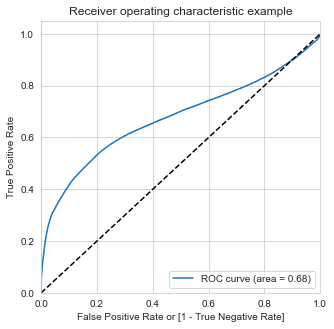

--------------------------------------------------------------------------------


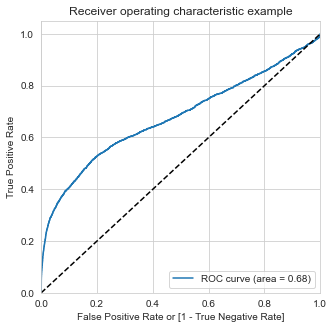

In [118]:
# # Logistic regression with optimal C

# logReg = LogisticRegression(C=0.001, penalty = "l2")

# clf_lsr = logReg.fit(XScaler, y_train)


# y_TestPred = logReg.predict(X_test)
# avg_prec = average_precision_score(y_test,y_TestPred)
# precision, recall, _ = precision_recall_curve(y_test,y_TestPred)
# print(classification_report(y_test,y_TestPred))
# print(confusion_matrix(y_true = y_test, y_pred = y_TestPred))

# Logistic regression with optimal C

logReg = LogisticRegression(C=0.001, penalty = 'l2')
logReg.fit(XScaler, y_train)

eval_model(logReg)

# ROC on Train

yTrainPredProba = logReg.predict_proba(X_train_SMT)[:,1]

draw_roc(y_train_SMT, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logReg.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

#### Logistic regression on SMOTE

In [119]:
logRegSmt = LogisticRegression()
logRegSmt.fit(X_train_SMT, y_train_SMT)

LogisticRegression()

In [120]:
#perform Hyperparameter tuning

params_logreg = {"C" : np.logspace(-3,3,7),
                "penalty" : ["l2"]}

lgReg_CV = GridSearchCV(estimator=logRegSmt,
                       param_grid= params_logreg,
                       scoring= 'recall',
                       n_jobs=-1,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

lgReg_CV.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [121]:
# Printing the best parameters
print(lgReg_CV.best_score_)
print(lgReg_CV.best_params_)
print(lgReg_CV.best_estimator_)
print(lgReg_CV.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV.cv_results_)

0.8980339392820529
{'C': 10.0, 'penalty': 'l2'}
LogisticRegression(C=10.0)
4


In [122]:
lg_cvResults

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      52.865347      1.126958         0.481494        0.020314   0.001   
1      51.895906      1.171566         0.468227        0.006400    0.01   
2      51.398692      1.125543         0.453369        0.017508     0.1   
3      53.127538      1.398011         0.469253        0.017802       1   
4      53.390677      1.207403         0.484380        0.024767      10   
5      53.850453      1.100926         0.482850        0.030001     100   
6      45.887411      0.670372         0.350605        0.054920    1000   

  param_penalty                          params  split0_test_score  \
0            l2   {'C': 0.001, 'penalty': 'l2'}           0.872033   
1            l2    {'C': 0.01, 'penalty': 'l2'}           0.886699   
2            l2     {'C': 0.1, 'penalty': 'l2'}           0.881474   
3            l2     {'C': 1.0, 'penalty': 'l2'}           0.881485   
4            l2    {'C': 10.0, 'penalty': 'l2'}           0.884173   
5            l2   {'C': 100.0, 'penalty': 'l2'}           0.881923   
6            l2  {'C': 1000.0, 'penalty': 'l2'}           0.878216   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.882720           0.880027           0.883264           0.881009   
1           0.896943           0.899171           0.888771           0.846856   
2           0.899558           0.893779           0.890799           0.890749   
3           0.895004           0.890771           0.911106           0.890284   
4           0.891308           0.896179           0.927168           0.891342   
5           0.889873           0.890017           0.901265           0.903798   
6           0.902046           0.882454           0.928864           0.895797   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.879811        0.004059                7            0.878867   
1         0.883688        0.019010                6            0.894733   
2         0.891272        0.005856                5            0.888439   
3         0.893730        0.009738                3            0.888890   
4         0.898034        0.015062                1            0.891460   
5         0.893375        0.008069                4            0.889430   
6         0.897475        0.017919                2            0.885963   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.880287            0.879456            0.881693   
1            0.894733            0.897106            0.887015   
2            0.898012            0.892262            0.888555   
3            0.893844            0.889245            0.909237   
4            0.889194            0.894680            0.925284   
5            0.887451            0.888670            0.899534   
6            0.900348            0.881124            0.926774   

   split4_train_score  mean_train_score  std_train_score  
0            0.879006          0.879862         0.001041  
1            0.845396          0.883796         0.019500  
2            0.888775          0.891208         0.003689  
3            0.888614          0.893966         0.007873  
4            0.889184          0.897960         0.013809  
5            0.902243          0.893466         0.006153  
6            0.893801          0.897602         0.016000

Train set perforance
accuracy_score - 	 0.925366626108965
recall_score - 	 0.9083318373525351
f1_score - 	 0.92407322961449
confusion_matrix - 
 [[850440  51978]
 [ 82723 819695]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9406457019611674
recall_score - 	 0.6527531083481349
f1_score - 	 0.11295093933689346
confusion_matrix - 
 [[364444  22307]
 [   782   1470]]


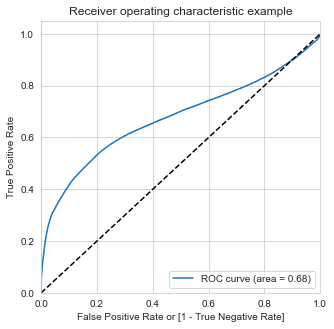

--------------------------------------------------------------------------------


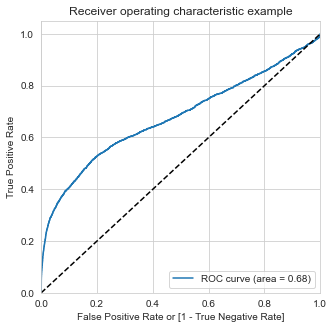

In [123]:
# Logistic regression with optimal C

# logReg = LogisticRegression(C=0.001, penalty = 'l2')
# logReg.fit(X_train_SMT, y_train_SMT)

eval_model_smt(logRegSmt)

# ROC on Train

yTrainPredProba = logReg.predict_proba(X_train_SMT)[:,1]

draw_roc(y_train_SMT, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logReg.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

#### Logistic regression on ADASYN

In [124]:
logRegAda = LogisticRegression()

In [125]:
#perform Hyperparameter tuning

params_logreg = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                "penalty" : ["l2"]}

lgReg_CV_Ada = GridSearchCV(estimator=logRegAda,
                       param_grid= params_logreg,
                       scoring= 'recall',
                       n_jobs=-1,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

lgReg_CV_Ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [126]:
# Printing the best parameters
print(lgReg_CV_Ada.best_score_)
print(lgReg_CV_Ada.best_params_)
print(lgReg_CV_Ada.best_estimator_)
print(lgReg_CV_Ada.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV_Ada.cv_results_)

0.9000103311553478
{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
1


In [127]:
lg_cvResults

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      52.212968      1.012135         0.475927        0.011959   0.001   
1      52.558337      0.955556         0.466416        0.013519    0.01   
2      54.438400      1.934728         0.474543        0.028596     0.1   
3      52.614228      3.208119         0.452357        0.042938       1   
4      51.957294      1.129925         0.486906        0.019857      10   
5      53.383319      1.575669         0.392553        0.119070     100   

  param_penalty                         params  split0_test_score  \
0            l2  {'C': 0.001, 'penalty': 'l2'}           0.878531   
1            l2   {'C': 0.01, 'penalty': 'l2'}           0.895617   
2            l2    {'C': 0.1, 'penalty': 'l2'}           0.883538   
3            l2      {'C': 1, 'penalty': 'l2'}           0.915660   
4            l2     {'C': 10, 'penalty': 'l2'}           0.890066   
5            l2    {'C': 100, 'penalty': 'l2'}           0.911999   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.882612           0.873816           0.862758           0.883017   
1           0.927971           0.886444           0.887936           0.902084   
2           0.893287           0.886167           0.892428           0.896715   
3           0.901955           0.890570           0.886927           0.892245   
4           0.915376           0.883277           0.888668           0.901840   
5           0.904462           0.881791           0.886589           0.893831   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.876147        0.007475                6            0.883273   
1         0.900010        0.015068                1            0.897471   
2         0.890427        0.004844                5            0.890677   
3         0.897471        0.010364                2            0.927344   
4         0.895845        0.011491                3            0.893161   
5         0.895734        0.011157                4            0.923019   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.879450            0.872771            0.868436   
1            0.923174            0.884243            0.892604   
2            0.892141            0.885743            0.898474   
3            0.899492            0.891452            0.890967   
4            0.911913            0.884944            0.894212   
5            0.902566            0.883226            0.891374   

   split4_train_score  mean_train_score  std_train_score  
0            0.880173          0.876821         0.005413  
1            0.896980          0.898894         0.013034  
2            0.892504          0.891908         0.004076  
3            0.890221          0.899895         0.014130  
4            0.898634          0.896573         0.008855  
5            0.888281          0.897693         0.014163

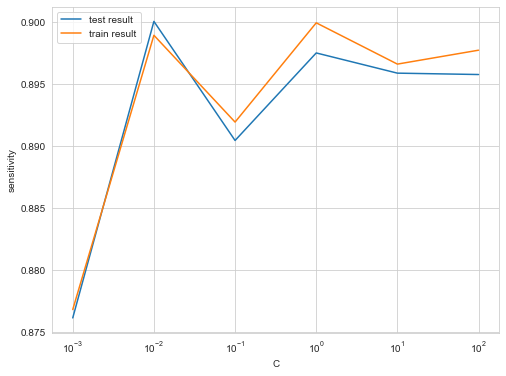

In [128]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(lg_cvResults['param_C'], lg_cvResults['mean_test_score'])
plt.plot(lg_cvResults['param_C'], lg_cvResults['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Train set perforance
accuracy_score - 	 0.879454057952296
recall_score - 	 0.8549162972238828
f1_score - 	 0.8763715725963477
confusion_matrix - 
 [[815758  86660]
 [130805 770778]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9030187427860453
recall_score - 	 0.6589698046181173
f1_score - 	 0.07293458495109843
confusion_matrix - 
 [[349793  36958]
 [   768   1484]]


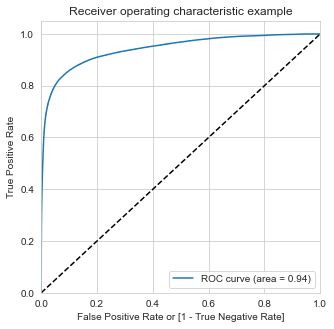

--------------------------------------------------------------------------------


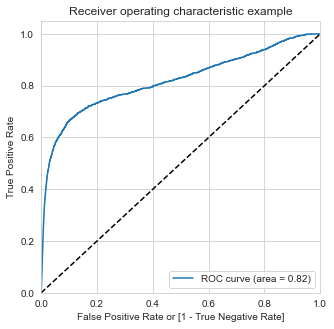

In [129]:
# Logistic regression with optimal C

logRegAda = LogisticRegression(C=0.001, penalty= 'l2')
logRegAda.fit(X_train_ada, y_train_ada)

eval_model_ada(logRegAda)

# ROC on Train

yTrainPredProba = logRegAda.predict_proba(X_train_ada)[:,1]

draw_roc(y_train_ada, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logRegAda.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

All the sampling techniques in the Logistic regression wont give a better score 

In [130]:
df.head(2)

trans_date_trans_time            cc_num                         merchant  \
0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme   

      amt      first   last  gender                        street  \
0    4.97   Jennifer  Banks       1                561 Perry Cove   
1  107.23  Stephanie   Gill       1  43039 Riley Greens Suite 393   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   

   is_fraud  cust_age  month day_name  hour  weekday  trans_dist  \
0         0        31      1  Tuesday     0        1   10.509708   
1         0        41      1  Tuesday     0        1   30.171468   

   category_entertainment  category_food_dining  category_gas_transport  \
0                       0                     0                       0   
1                       0                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   

   category_travel  
0                0  
1                0

In [131]:
X_train.head()

amt  gender   city_pop  cust_age  month  hour  weekday  \
192318  5.297667       1   8.312381        44      4    23        0   
318906  2.613740       1   5.572154        63      6    12        6   
212432  3.870784       1   8.485703        93      4    17        3   
979043  5.056883       1  12.320544        35      2    23        5   
614236  4.710611       1   5.780744        43      9    23        1   

        trans_dist  category_entertainment  category_food_dining  \
192318   54.108679                       0                     0   
318906   54.416339                       0                     0   
212432   12.556140                       0                     0   
979043   68.292947                       0                     0   
614236   57.054963                       0                     0   

        category_gas_transport  category_grocery_net  category_grocery_pos  \
192318                       0                     0                     0   
318906                       0                     0                     0   
212432                       0                     0                     0   
979043                       0                     0                     0   
614236                       0                     0                     0   

        category_health_fitness  category_home  category_kids_pets  \
192318                        0              0                   0   
318906                        0              0                   1   
212432                        0              0                   0   
979043                        0              1                   0   
614236                        1              0                   0   

        category_misc_net  category_misc_pos  category_personal_care  \
192318                  0                  0                       0   
318906                  0                  0                       0   
212432                  0                  0                       1   
979043                  0                  0                       0   
614236                  0                  0                       0   

        category_shopping_net  category_shopping_pos  category_travel  
192318                      1                      0                0  
318906                      0                      0                0  
212432                      0                      0                0  
979043                      0                      0                0  
614236                      0                      0                0

# Summary to all the models evaluated above 

In this file, I have considered the Decision tree model, XGboost model, and Logistic regression model and for the sampling techniques, I used SMOTE and ADASYN. 

Although I have tested the model without it and noted the results, so this makes 9 models.

Out of these 9 models, the model which gave me the perfect score was XGboost with ADASYN as its sampling technique, the score is as follows.
- accuracy - 0.97
- recall -0.94
- f1 -0.25

for training data

- accuracy - 0.96
- recall -0.87
- f1 -0.22

for test data

Here, we have focused on getting maximum recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions.

# Testing the model on unseen data that model has never seen.
My best model was XGBoost with ADASYN as its sampling technique 

In [162]:
XTestCsv.shape,yTestCsv.shape

((555719, 22), (555719,))

In [163]:
# Making helper function for model performance
def eval_model_ada_test(dt_classifiers):
    y_test_pred = dt_classifiers.predict(XTestCsv)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(yTestCsv,y_test_pred))
    print('recall_score - \t',recall_score(yTestCsv,y_test_pred))
    print('f1_score - \t',f1_score(yTestCsv,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(yTestCsv,y_test_pred))

Train set perforance
accuracy_score - 	 0.8150630084629102
recall_score - 	 0.5048951048951049
f1_score - 	 0.020640562612565395
confusion_matrix - 
 [[451863 101711]
 [  1062   1083]]


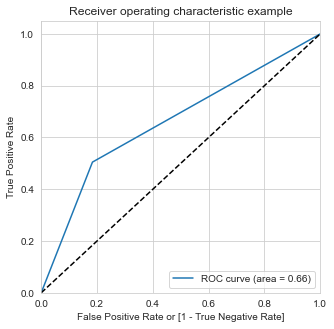

test


In [180]:
# evaluate the model
eval_model_ada_test(logRegAda)

# Plotting the AUC-ROC curve
# Predicted probability on test data
y_test_DT_pred_proba = logRegAda.predict(XTestCsv)

# Plotting the ROC curve on test data
draw_roc(yTestCsv, y_test_DT_pred_proba)
print('test')

In [182]:
# Predicted probability on test data
final_Y = logRegAda.predict(XTestCsv)

print(recall_score(yTestCsv, final_Y))
print(confusion_matrix(yTestCsv, final_Y))

0.5048951048951049
[[451863 101711]
 [  1062   1083]]


The model is catching a whooping 98% of fraudlent transactions, Hence we can find this model to be useful

# ENDING THE MODEL BUILDING PART HERE

# Cost-Benefit Analysis

In [183]:
# Creating a new column "year_trns"
df['year_trns'] = pd.DatetimeIndex(df.trans_date_trans_time).year

# Creating a new column "year_trns"
dfTest['year_trns'] = pd.DatetimeIndex(dfTest.trans_date_trans_time).year

In [184]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'cust_age', 'month', 'day_name', 'hour', 'weekday',
       'trans_dist', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'year_trns'],
      dtype='object')

In [185]:
print(df.groupby(['year_trns', 'month', 'is_fraud']).amt.sum())

year_trns  month  is_fraud
2019       1      0           3497969.65
                  1            261780.38
           2      0           3330611.15
                  1            274051.08
           3      0           4790248.81
                  1            237637.59
           4      0           4559437.29
                  1            202067.29
           5      0           4850354.21
                  1            210549.11
           6      0           5858192.82
                  1            178204.60
           7      0           5855325.15
                  1            188701.59
           8      0           5843337.52
                  1            203951.13
           9      0           4732159.05
                  1            217675.37
           10     0           4593527.65
                  1            257739.72
           11     0           4722945.12
                  1            200307.47
           12     0           9583021.64
                  1           

#### this data set has data only 1 year 6 months, it looks like we can merge test.csv and train.csv file to gain complete data

In [186]:
final = pd.concat([df, dfTest])

In [187]:
final.shape, df.shape, dfTest.shape

((1852394, 42), (1296675, 42), (555719, 42))

In [188]:
print(final.groupby(['year_trns', 'month', 'is_fraud']).amt.sum())

year_trns  month  is_fraud
2019       1      0           3497969.65
                  1            261780.38
           2      0           3330611.15
                  1            274051.08
           3      0           4790248.81
                  1            237637.59
           4      0           4559437.29
                  1            202067.29
           5      0           4850354.21
                  1            210549.11
           6      0           5858192.82
                  1            178204.60
           7      0           5855325.15
                  1            188701.59
           8      0           5843337.52
                  1            203951.13
           9      0           4732159.05
                  1            217675.37
           10     0           4593527.65
                  1            257739.72
           11     0           4722945.12
                  1            200307.47
           12     0           9583021.64
                  1           

In [189]:
# so now we merged the 2 files 
# this data set have 2 years of data on transactions lets split that onto 2 parts i.e on year 

y20 = final.loc[final.year_trns == 2020]
y19 = final.loc[final.year_trns == 2019]

### Part I: Analyse the dataset and find the following figures:

- Average number of transactions per month 
- Average number of fraudulent transactions per month
- Average amount per fraudulent transaction 

In [190]:
# Average number of transactions per month 2020
avgMthTrns20 = round(((y20.cc_num.count())/12),2)

# Average number of transactions per month 2020
avgMthTrns19 = round(((y19.cc_num.count())/12),2)

# Average number of transactions on data set
avgMthTrns = round(((final.cc_num.count())/24),2)

print('Average number of transactions per month 2020 is {}, 2019 is {} and on total dataset is {}'.format(avgMthTrns20,
                                                                                                             avgMthTrns19,
                                                                                                            avgMthTrns))

Average number of transactions per month 2020 is 77295.33, 2019 is 77070.83 and on total dataset is 77183.08


In [191]:
# Average number of fraudulent transactions per month

TrnsPrMnt20 = (y20.loc[y20.is_fraud == 1].count()[0])/12

TrnsPrMnt19 = (y19.loc[y19.is_fraud == 1].count()[0])/12

TrnsPrMnt = (final.loc[final.is_fraud == 1].count()[0])/24

print('Average number of fraudulent transactions per month for 2020 is {} and 2019 is {} and on total dataset is {}'.format(TrnsPrMnt20,
                                                                                                 TrnsPrMnt19,
                                                                                                TrnsPrMnt))

Average number of fraudulent transactions per month for 2020 is 369.25 and 2019 is 435.0 and on total dataset is 402.125


In [192]:
# Average amount per fraudulent transaction
AmtPrMnt20 = round((y20.loc[y20.is_fraud == 1].amt.sum() / (y20.loc[y20.is_fraud == 1].count()[0])),2 )

AmtPrMnt19 = round((y19.loc[y19.is_fraud == 1].amt.sum() / (y19.loc[y19.is_fraud == 1].count()[0])),2 )

AmtPrMnt = round((final.loc[final.is_fraud == 1].amt.sum() / (final.loc[final.is_fraud == 1].count()[0])),2)

print('Average amount per fraudulent transaction for 2020 is {} and 2019 is {} and on total dataset is {}'.format(AmtPrMnt20,
                                                                                                                  AmtPrMnt19,
                                                                                                                 AmtPrMnt))

Average amount per fraudulent transaction for 2020 is 531.16 and 2019 is 530.23 and on total dataset is 530.66


### Part II: Compare the cost incurred per month by the bank before and after the model deployment:

- Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

- Cost incurred per month after the model is built and deployed: Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below>
 

Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

- Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.

Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

- Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

- Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN
- Final savings = Cost incurred before - Cost incurred after.
 

Note that you’re not including the model deployment cost since it will only be a one-time expenditure and you’re trying to gauge the long-term benefits of putting this model into practice.

In [193]:
# ![image.png](attachment:image.png)

In [194]:
FP = confusion_matrix(yTestCsv, final_Y)[0][1]
TP = confusion_matrix(yTestCsv, final_Y)[0][0]
FN = confusion_matrix(yTestCsv, final_Y)[1][0]
TN = confusion_matrix(yTestCsv, final_Y)[1][1]
confusion_matrix(yTestCsv, final_Y)

array([[451863, 101711],
       [  1062,   1083]], dtype=int64)

In [195]:
# Cost incurred per month before the model was deployed = 
# Average amount per fraudulent transaction * Average number of fraudulent transactions per month

bfr = round((AmtPrMnt * TrnsPrMnt),2)
print('Cost incurred per month before the model was deployed',bfr)

Cost incurred per month before the model was deployed 213391.65


In [196]:
FN,TP

(1062, 451863)

In [208]:
# Cost incurred per month after the model is built and deployed: 
# Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below

TF = (((TP/(TP+FN))*FP)/7)

print('Total cost of providing customer support per month for fraudulent transactions detected by the model',TF * 1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model 21744.109759420906


In [209]:
(((TP/(TP+FN))*FP)/7)

14496.073172947272

In [210]:
((FN/(FN+TP))*FP)/7

34.069684195585836

In [211]:
# Cost incurred due to these fraudulent transactions left undetected by the model = 
# Average amount per fraudulent transaction * FN

print('Cost incurred due to these fraudulent transactions left undetected by the model',round((AmtPrMnt * (FN/9651)),2))

Cost incurred due to these fraudulent transactions left undetected by the model 58.39


In [212]:
# Therefore, the cost incurred per month after the model is built and deployed = 
# 1.5*TF + Average amount per fraudulent transaction * FN

aft = round(((1.5 * (TF/9651)) + (AmtPrMnt * (FN/9651))),2)
print('Therefore, the cost incurred per month after the model is built and deployed',aft)

Therefore, the cost incurred per month after the model is built and deployed 60.65


In [214]:
# Final savings = Cost incurred before - Cost incurred after.

FinalSaving = bfr - aft
print('Final savings are :', FinalSaving)

Final savings are : 213331.0
